# **EDA**

In [16]:
import pandas as pd

## Dataset Overview

In [17]:
df = pd.read_csv("../data/train_storming_round.csv")
df.head()

,row_id,agent_code,agent_age,agent_join_month,first_policy_sold_month,year_month,unique_proposals_last_7_days,unique_proposals_last_15_days,unique_proposals_last_21_days,unique_proposal,...,unique_quotations,unique_customers_last_7_days,unique_customers_last_15_days,unique_customers_last_21_days,unique_customers,new_policy_count,ANBP_value,net_income,number_of_policy_holders,number_of_cash_payment_policies
0,1,455ca878,45,2/1/2021,9/1/2023,1/1/2023,3,6,2,12,...,9,3,4,8,15,0,0,93313,30,162
1,2,c823ce77,48,4/1/2022,2/1/2024,1/1/2023,1,4,12,21,...,14,4,3,10,17,25,1071450,164804,0,175
2,3,62154055,53,5/1/2020,9/1/2023,1/1/2023,3,5,5,17,...,14,3,7,11,21,26,1601210,426690,84,78
3,4,c58bfa6e,44,7/1/2019,3/1/2022,1/1/2023,1,0,12,17,...,11,2,2,9,13,18,283230,47793,39,144
4,5,b1e5f770,20,9/1/2020,2/1/2023,1/1/2023,0,6,10,17,...,13,3,10,6,19,20,1957680,562239,19,40


In [18]:
df.describe(include="all")

,row_id,agent_code,agent_age,agent_join_month,first_policy_sold_month,year_month,unique_proposals_last_7_days,unique_proposals_last_15_days,unique_proposals_last_21_days,unique_proposal,...,unique_quotations,unique_customers_last_7_days,unique_customers_last_15_days,unique_customers_last_21_days,unique_customers,new_policy_count,ANBP_value,net_income,number_of_policy_holders,number_of_cash_payment_policies
count,15308.000000,15308,15308.000000,15308,15308,15308,15308.000000,15308.000000,15308.000000,15308.000000,...,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,1.530800e+04,1.530800e+04,15308.000000,15308.000000
unique,NaN,905,NaN,64,28,20,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,455ca878,NaN,5/1/2019,4/1/2024,8/1/2024,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,20,NaN,520,1305,905,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7654.500000,NaN,40.585772,NaN,NaN,NaN,1.491246,2.991116,10.045728,17.516527,...,13.922394,2.995493,4.997714,7.500523,15.493729,20.269990,1.025338e+06,2.280414e+05,30.968317,101.180886
std,4419.183296,NaN,11.688204,NaN,NaN,NaN,1.119554,2.001613,6.037296,6.616954,...,4.663777,1.644117,2.438918,3.468597,4.542321,9.541693,8.054989e+05,1.736671e+05,24.621933,75.323464
min,1.000000,NaN,20.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,1.160000e+03,0.000000,0.000000
25%,3827.750000,NaN,31.000000,NaN,NaN,NaN,0.000000,1.000000,5.000000,12.000000,...,11.000000,2.000000,3.000000,5.000000,12.000000,15.000000,3.473238e+05,9.282500e+04,12.000000,38.000000
50%,7654.500000,NaN,41.000000,NaN,NaN,NaN,1.000000,3.000000,10.000000,17.000000,...,14.000000,3.000000,5.000000,8.000000,15.000000,21.000000,9.031445e+05,1.899740e+05,28.000000,90.000000
75%,11481.250000,NaN,51.000000,NaN,NaN,NaN,2.000000,5.000000,15.000000,23.000000,...,17.000000,4.000000,7.000000,10.000000,19.000000,27.000000,1.560700e+06,3.217448e+05,48.000000,152.000000


In [19]:
df.dtypes

row_id                              int64
agent_code                         object
agent_age                           int64
agent_join_month                   object
first_policy_sold_month            object
year_month                         object
unique_proposals_last_7_days        int64
unique_proposals_last_15_days       int64
unique_proposals_last_21_days       int64
unique_proposal                     int64
unique_quotations_last_7_days       int64
unique_quotations_last_15_days      int64
unique_quotations_last_21_days      int64
unique_quotations                   int64
unique_customers_last_7_days        int64
unique_customers_last_15_days       int64
unique_customers_last_21_days       int64
unique_customers                    int64
new_policy_count                    int64
ANBP_value                          int64
net_income                          int64
number_of_policy_holders            int64
number_of_cash_payment_policies     int64
dtype: object

### Data cleaning - datetime

In [20]:
date_columns = ['agent_join_month', 'first_policy_sold_month', 'year_month']

for col in date_columns:
    df[col] = pd.to_datetime(df[col], format='mixed', dayfirst=False, errors='coerce')

df['year_month'].value_counts()

year_month
2024-08-01    905
2024-07-01    892
2024-06-01    871
2024-05-01    851
2024-04-01    842
2024-03-01    822
2024-02-01    806
2024-01-01    792
2023-12-01    775
2023-11-01    763
2023-10-01    755
2023-09-01    745
2023-08-01    730
2023-07-01    716
2023-06-01    699
2023-05-01    688
2023-04-01    677
2023-03-01    670
2023-02-01    659
2023-01-01    650
Name: count, dtype: int64

In [21]:
df.shape

(15308, 23)

In [22]:
df.dtypes

row_id                                      int64
agent_code                                 object
agent_age                                   int64
agent_join_month                   datetime64[ns]
first_policy_sold_month            datetime64[ns]
year_month                         datetime64[ns]
unique_proposals_last_7_days                int64
unique_proposals_last_15_days               int64
unique_proposals_last_21_days               int64
unique_proposal                             int64
unique_quotations_last_7_days               int64
unique_quotations_last_15_days              int64
unique_quotations_last_21_days              int64
unique_quotations                           int64
unique_customers_last_7_days                int64
unique_customers_last_15_days               int64
unique_customers_last_21_days               int64
unique_customers                            int64
new_policy_count                            int64
ANBP_value                                  int64


## Data exploration


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

### Destribution of all the features

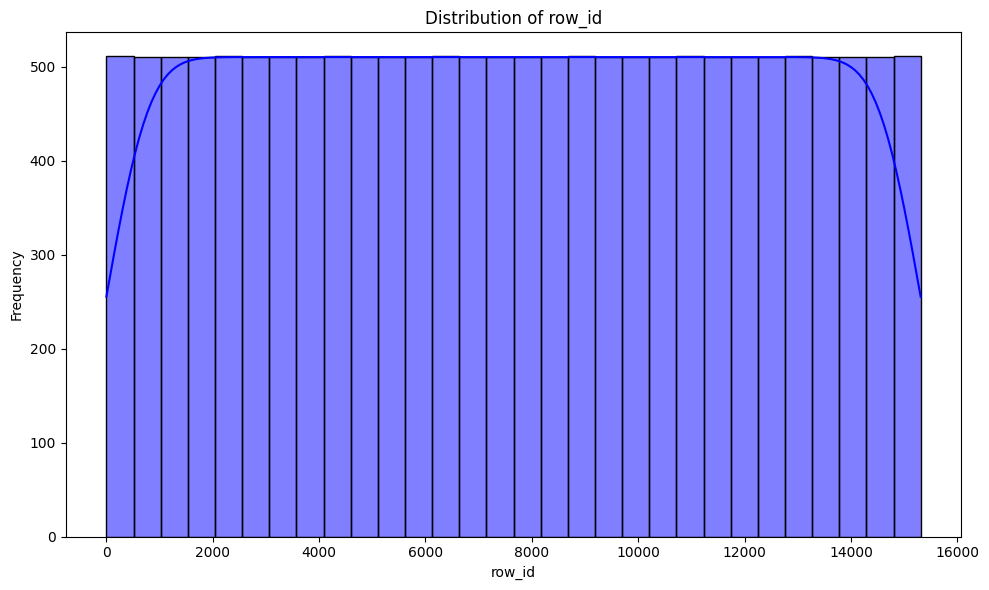

C:\Users\User\AppData\Local\Temp\ipykernel_14464\481390423.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=df, palette='Set2', order=df[column].value_counts().index)


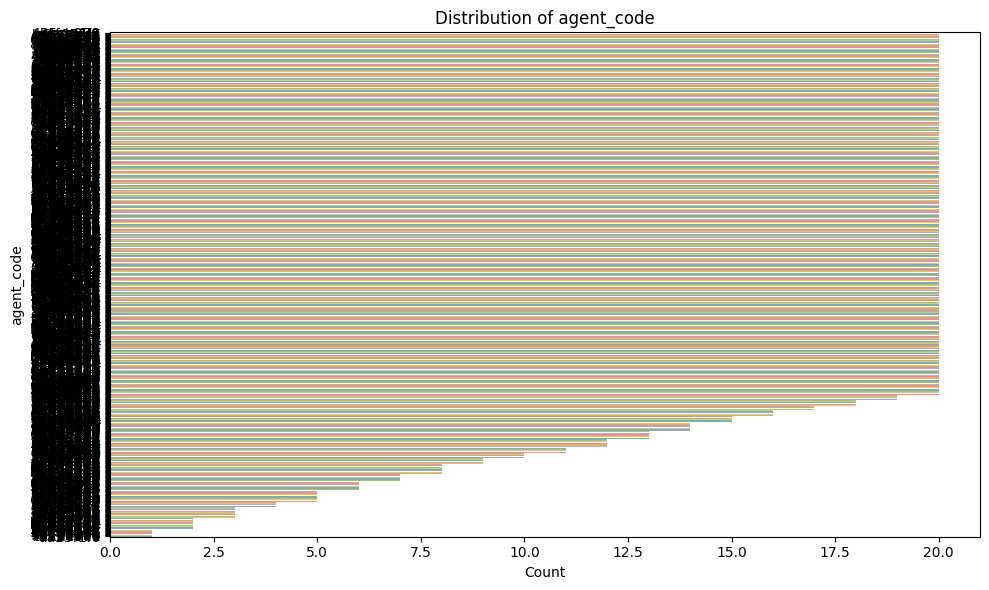

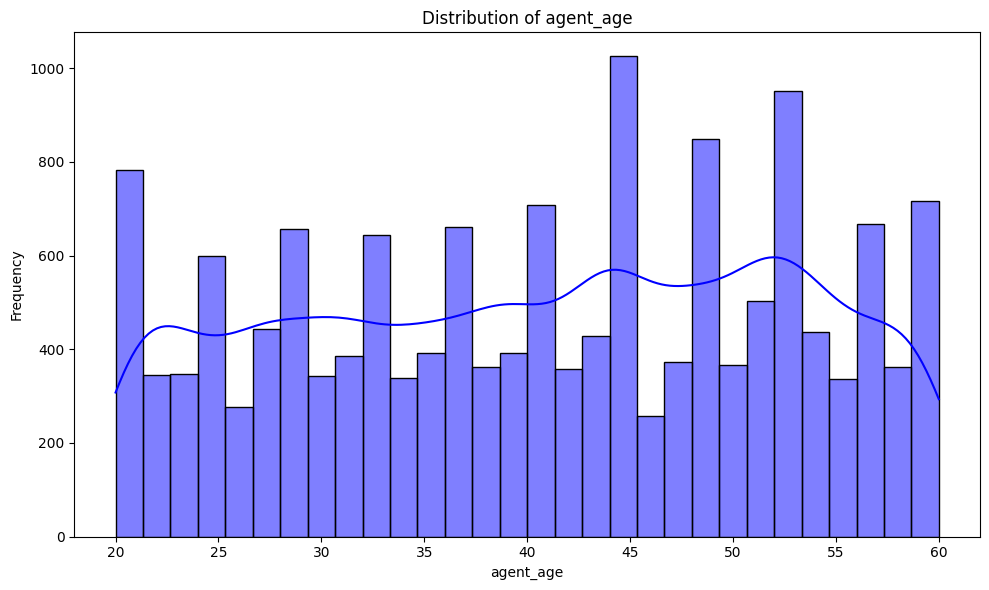

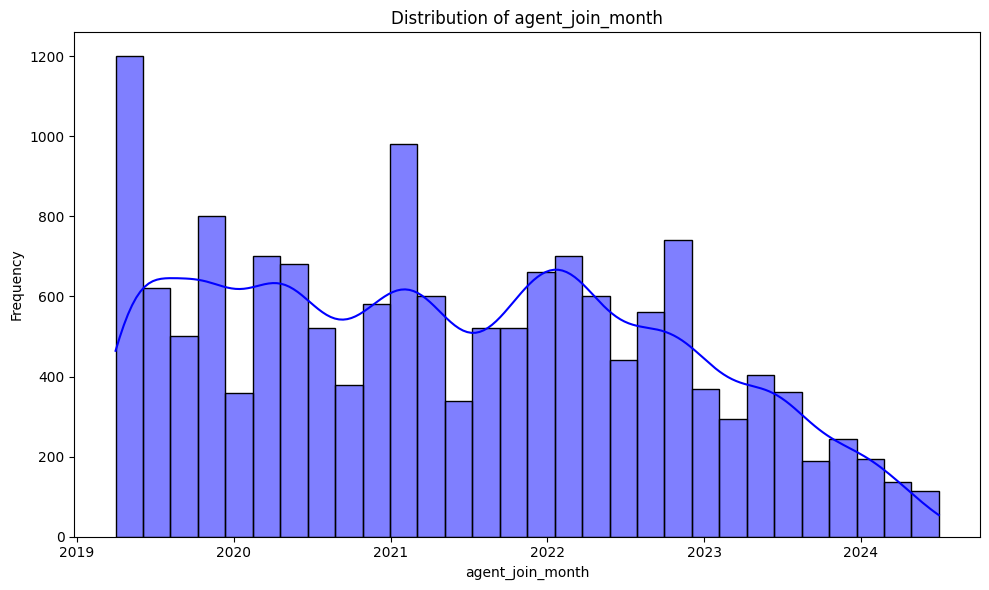

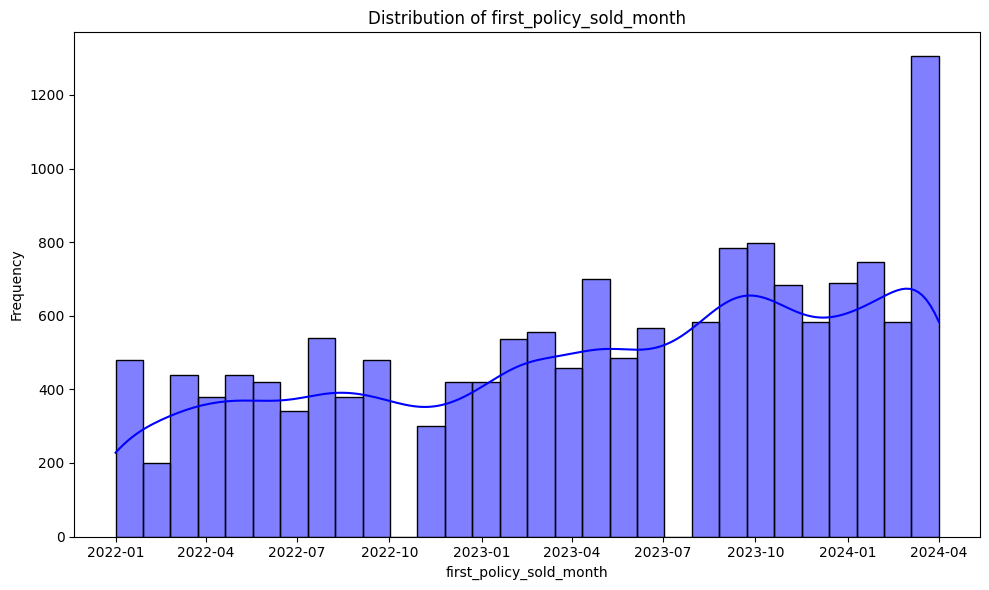

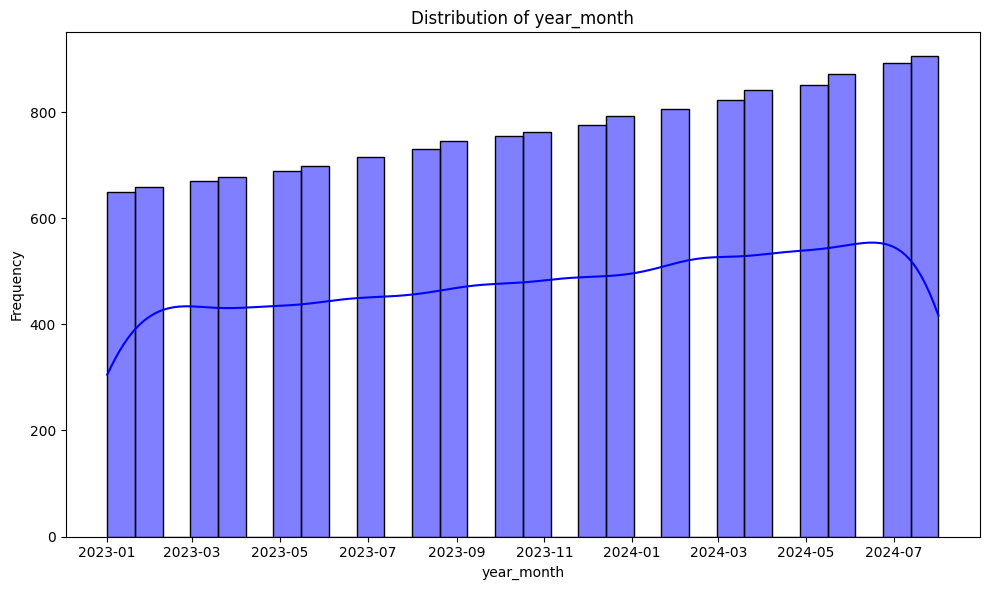

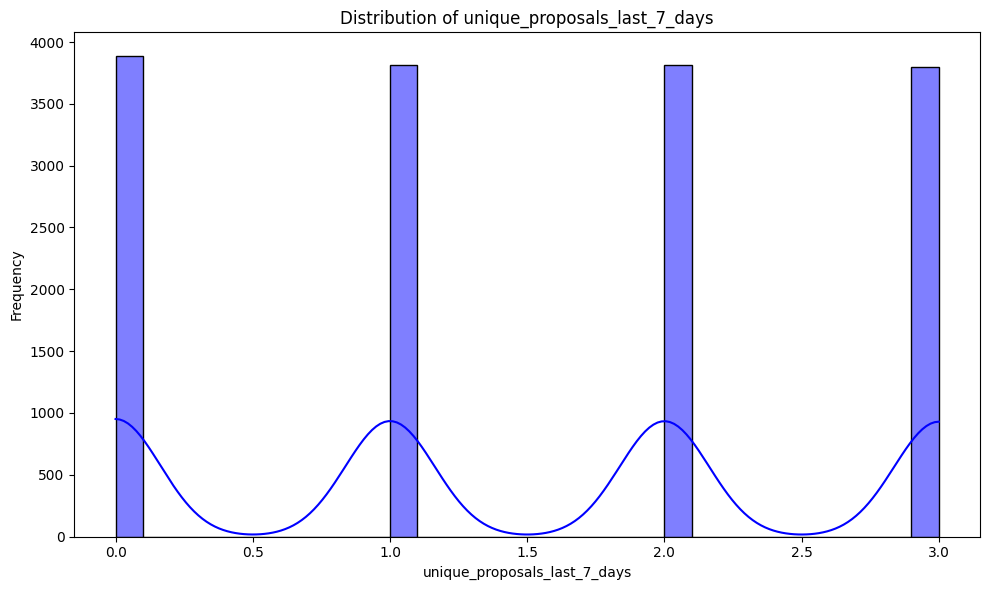

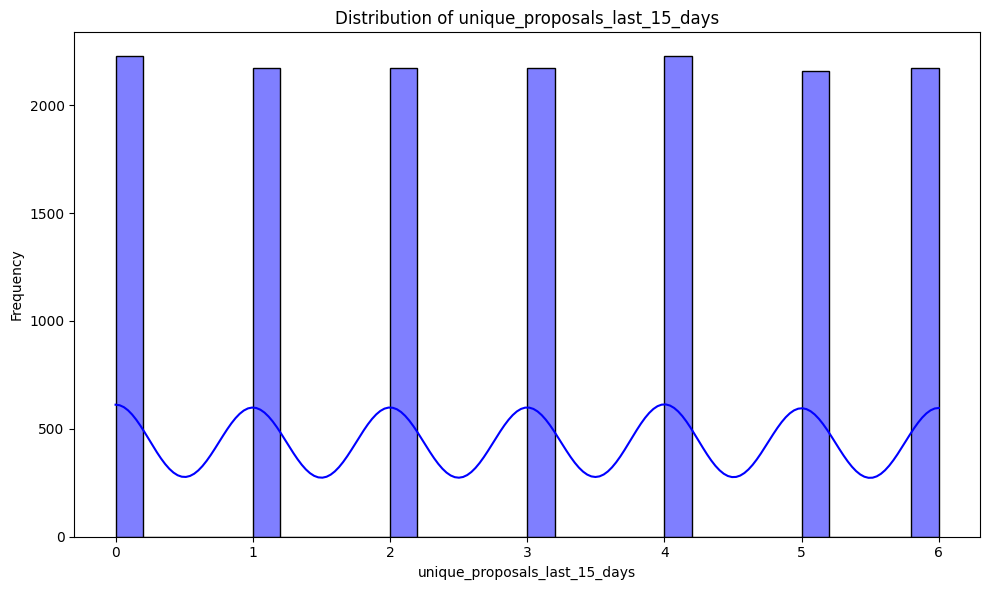

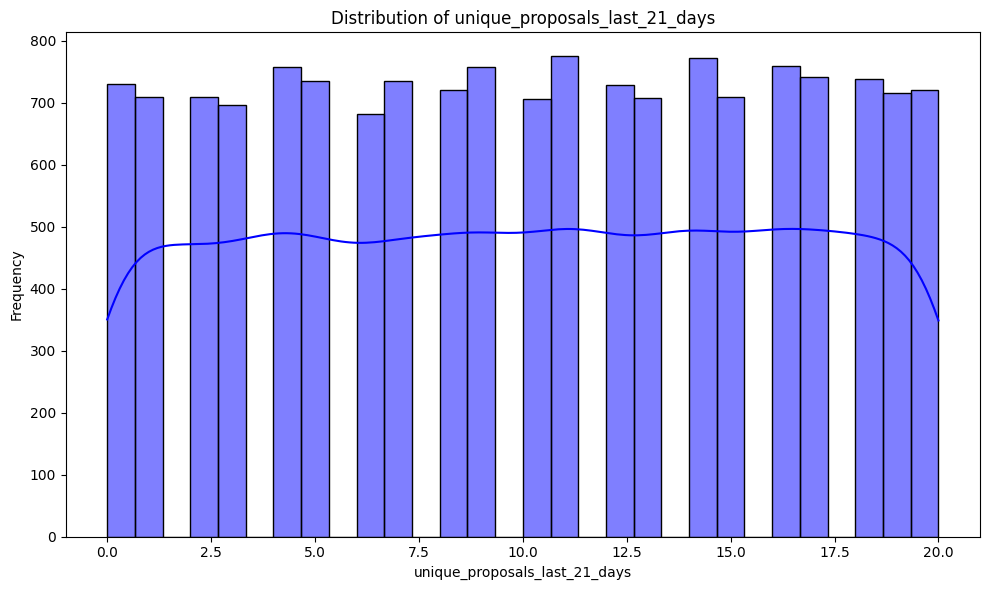

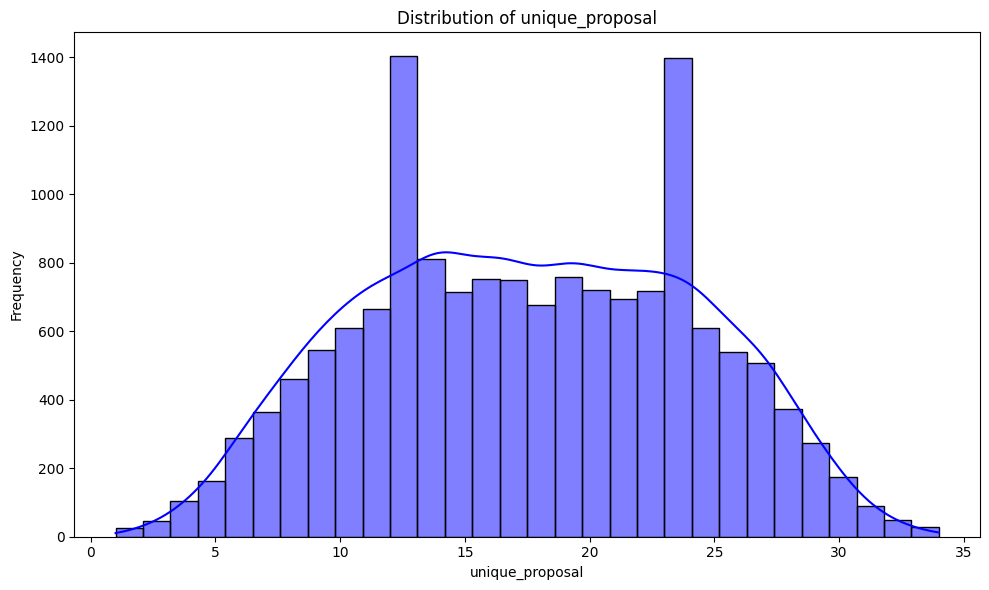

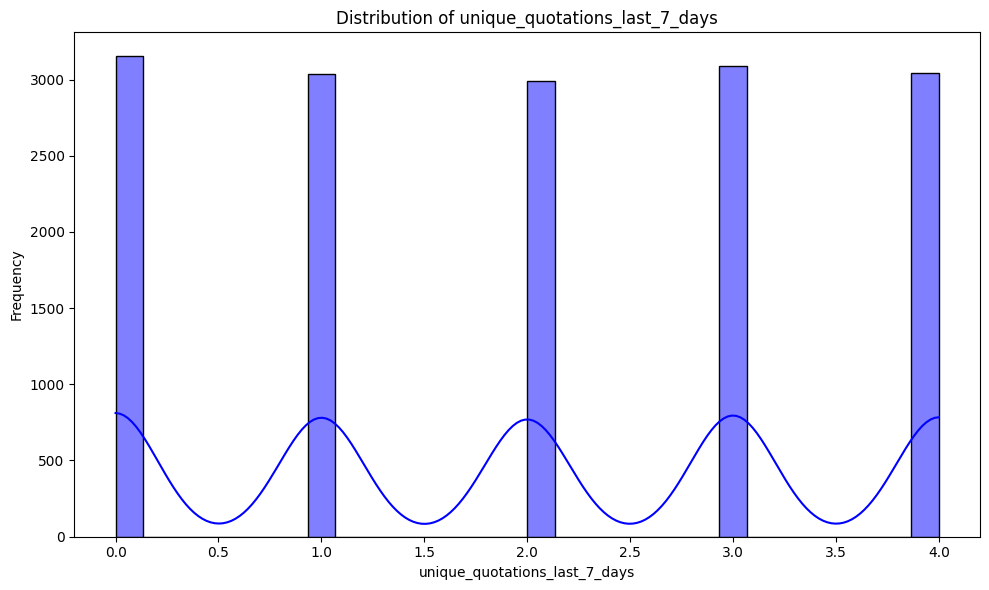

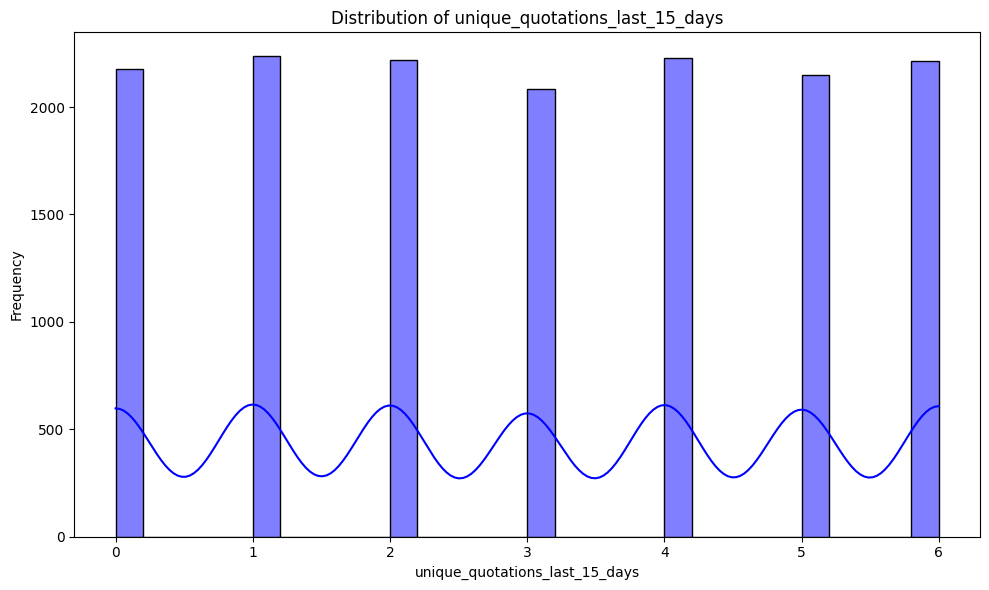

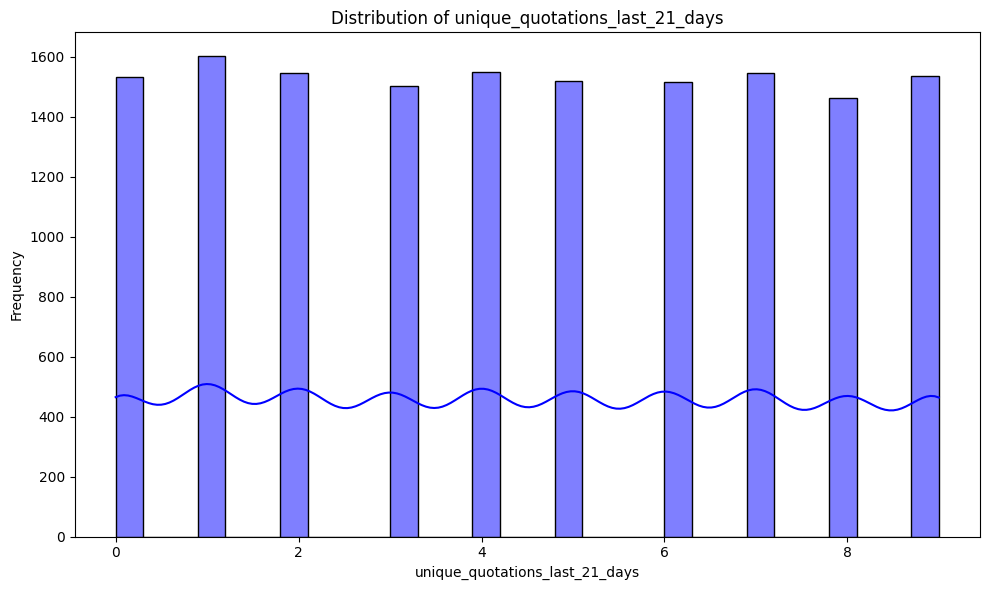

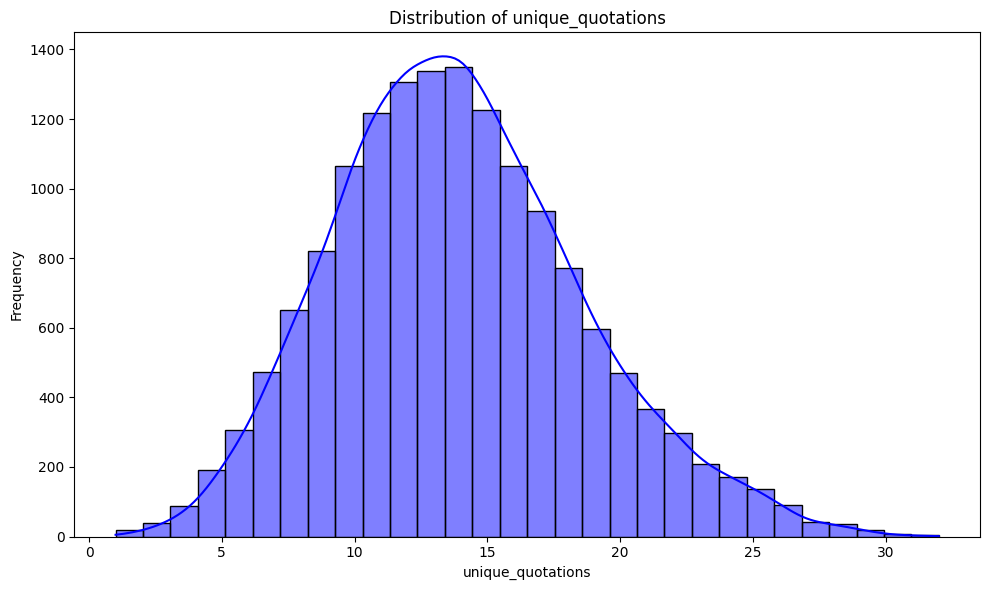

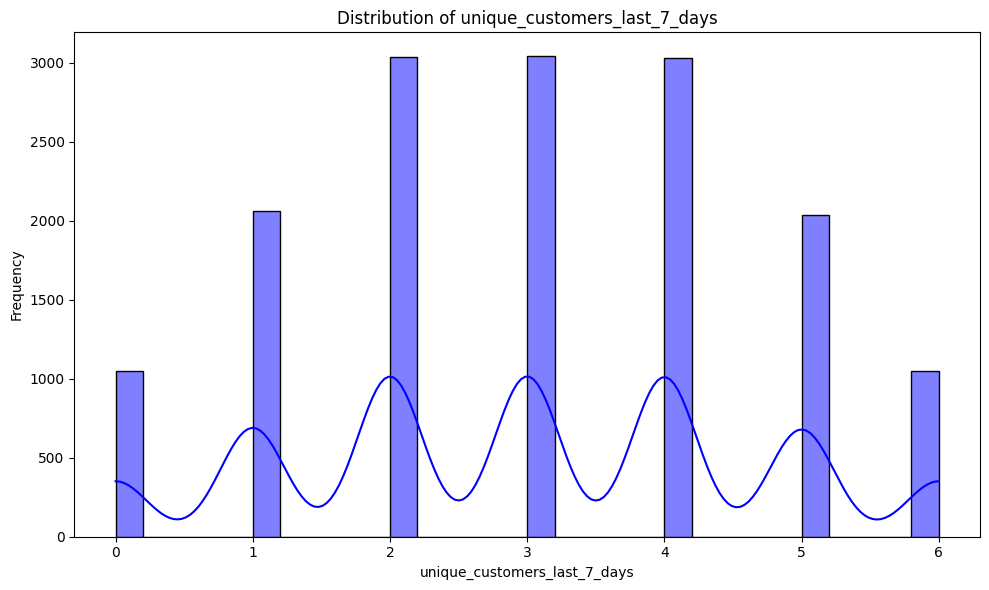

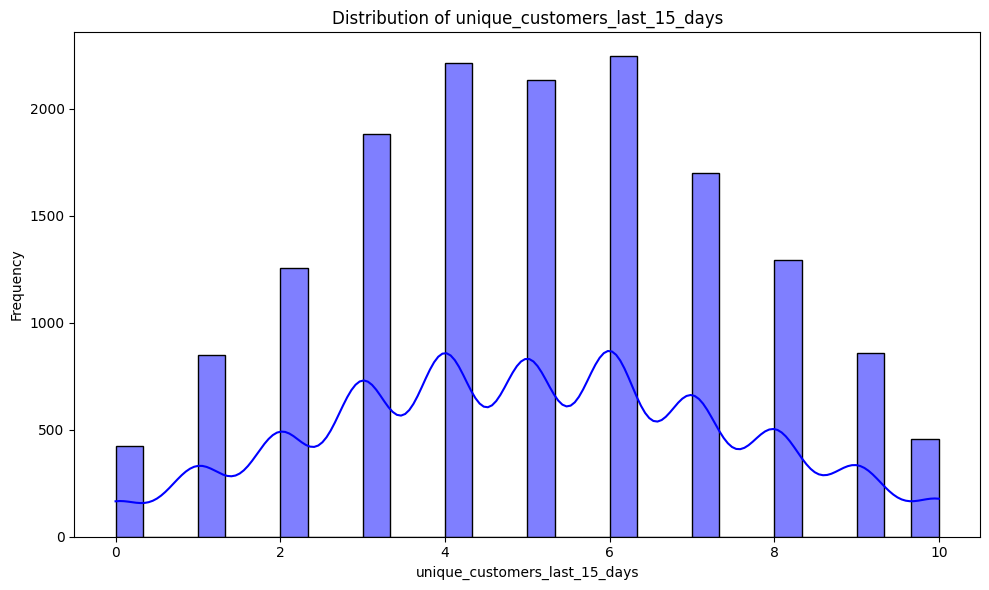

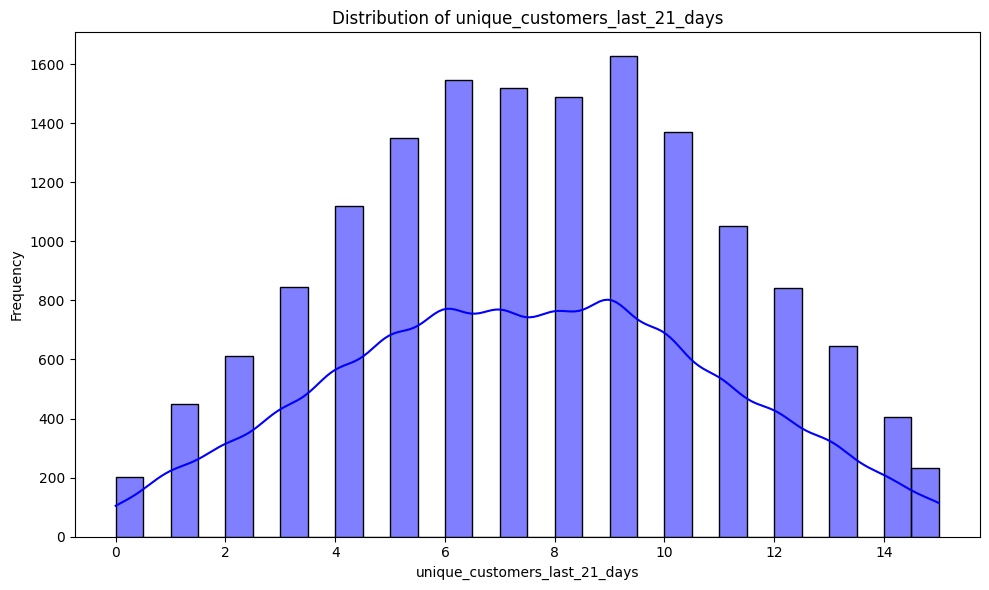

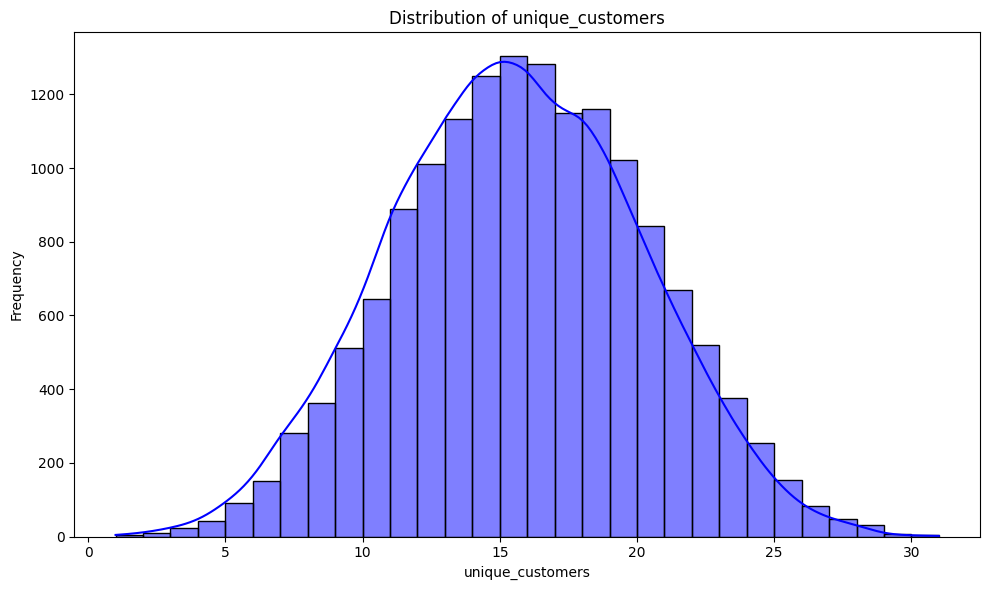

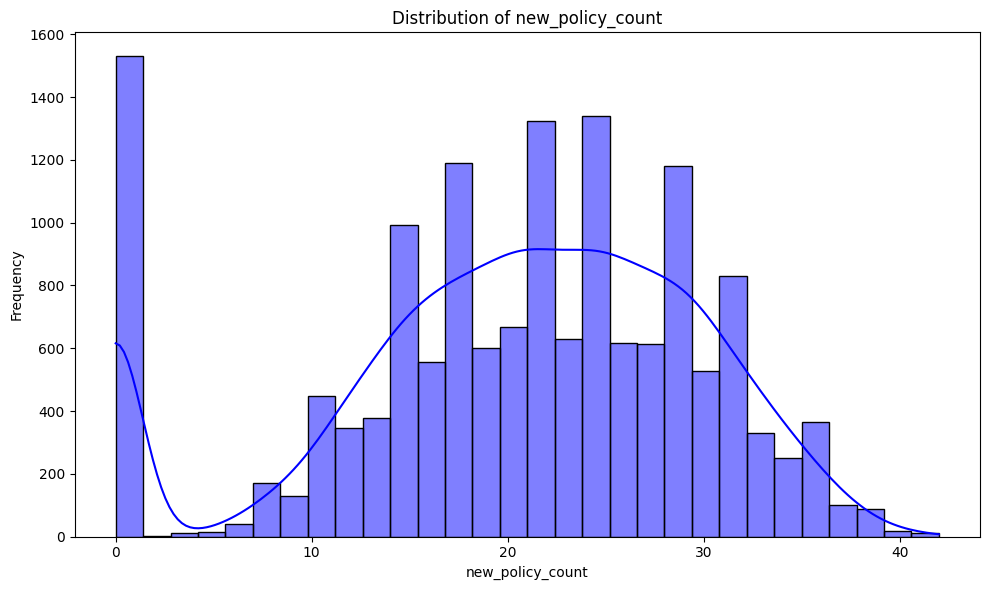

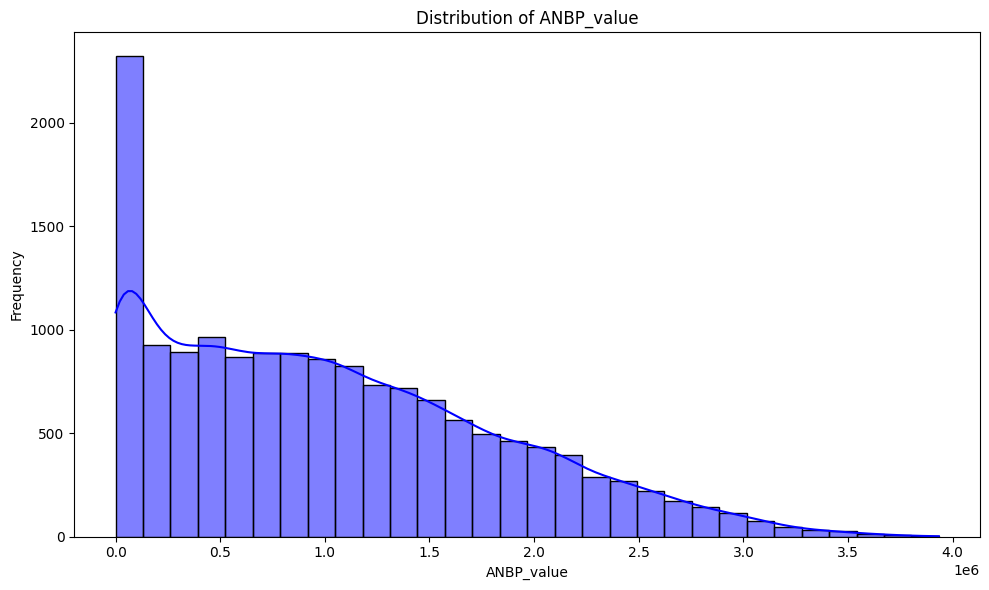

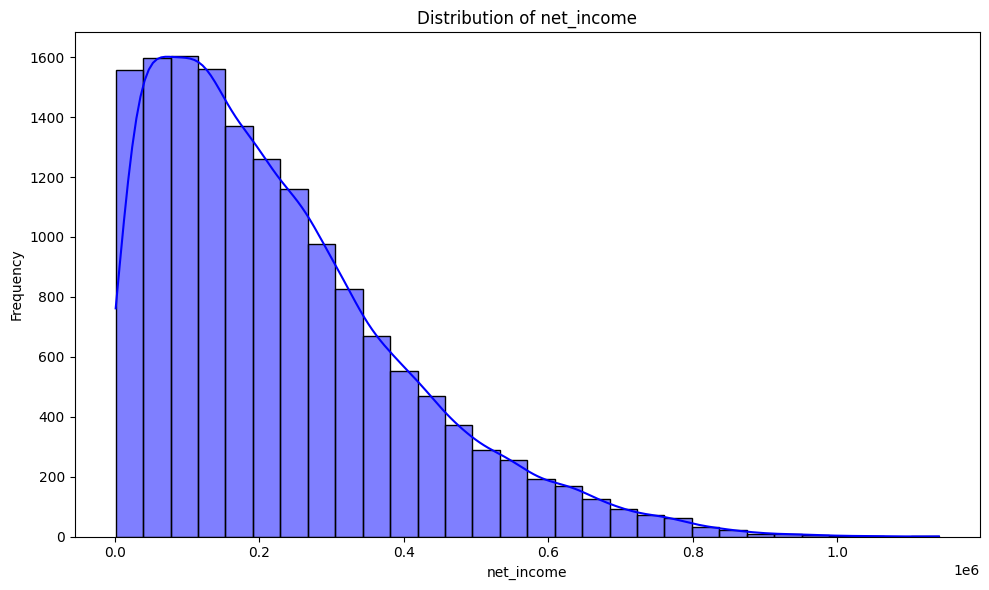

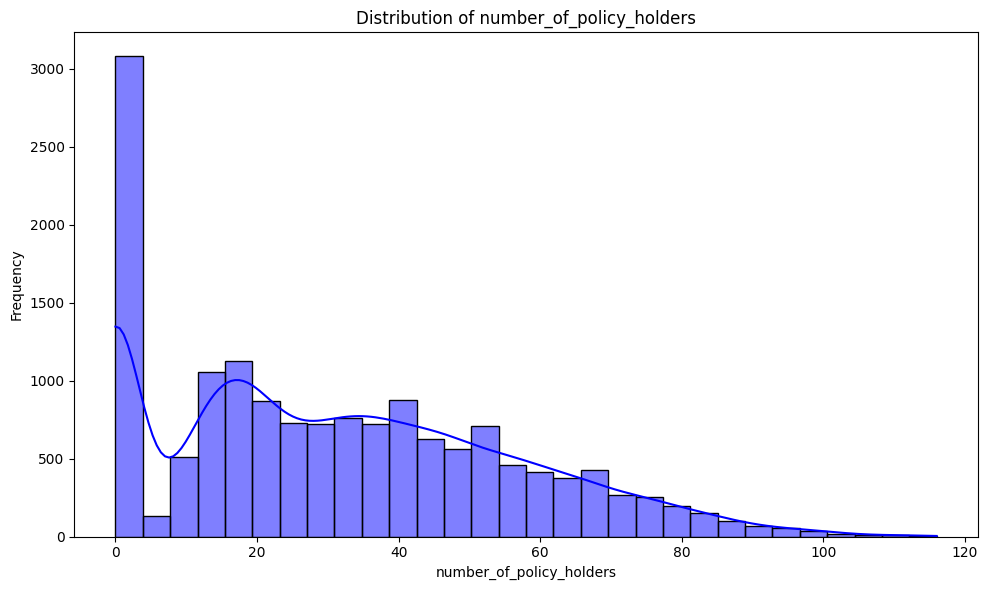

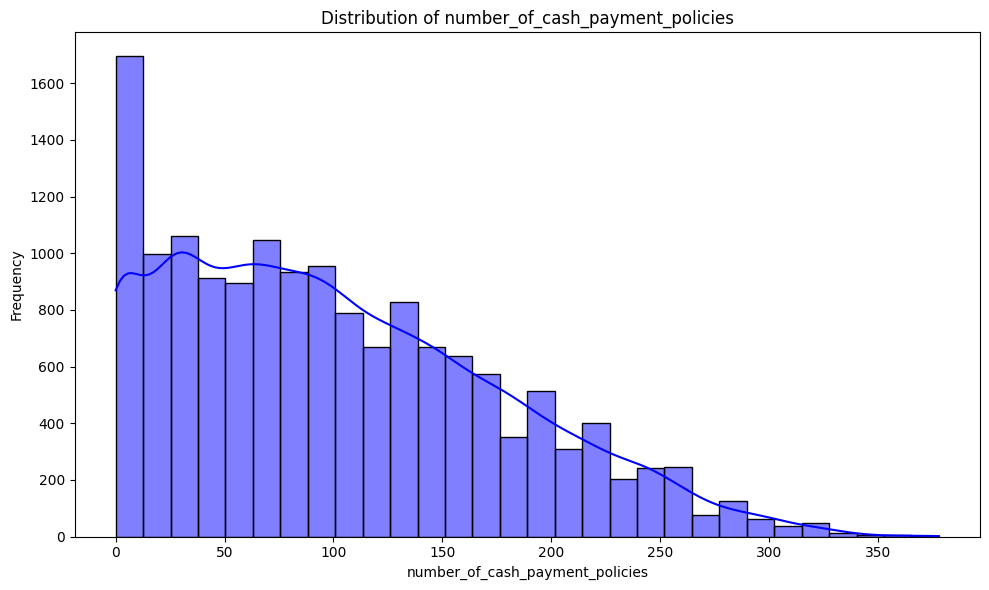

In [24]:
# Visualize the distribution of all features
for column in df.columns:
    plt.figure(figsize=(10, 6))
    if df[column].dtype == 'object':
        # Bar plot for categorical features
        sns.countplot(y=column, data=df, palette='Set2', order=df[column].value_counts().index)
        plt.title(f'Distribution of {column}')
        plt.xlabel('Count')
        plt.ylabel(column)
    else:
        # Histogram for numerical features
        sns.histplot(df[column], kde=True, bins=30, color='blue')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

From the analysis above, it is evident that certain features exhibit positive skewness and contain outliers. Features such as `ANBP_value`, `net_income`, `number_of_policy_holders`, and `number_of_cash_payment_policies` are positively skewed. To address this, these features should be normalized using a logarithmic scale to reduce skewness and improve the distribution.

### Policies sold - monthwise

C:\Users\User\AppData\Local\Temp\ipykernel_14464\4238565235.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year_month', y='new_policy_count', data=monthly_policy_sales, palette='Set2')


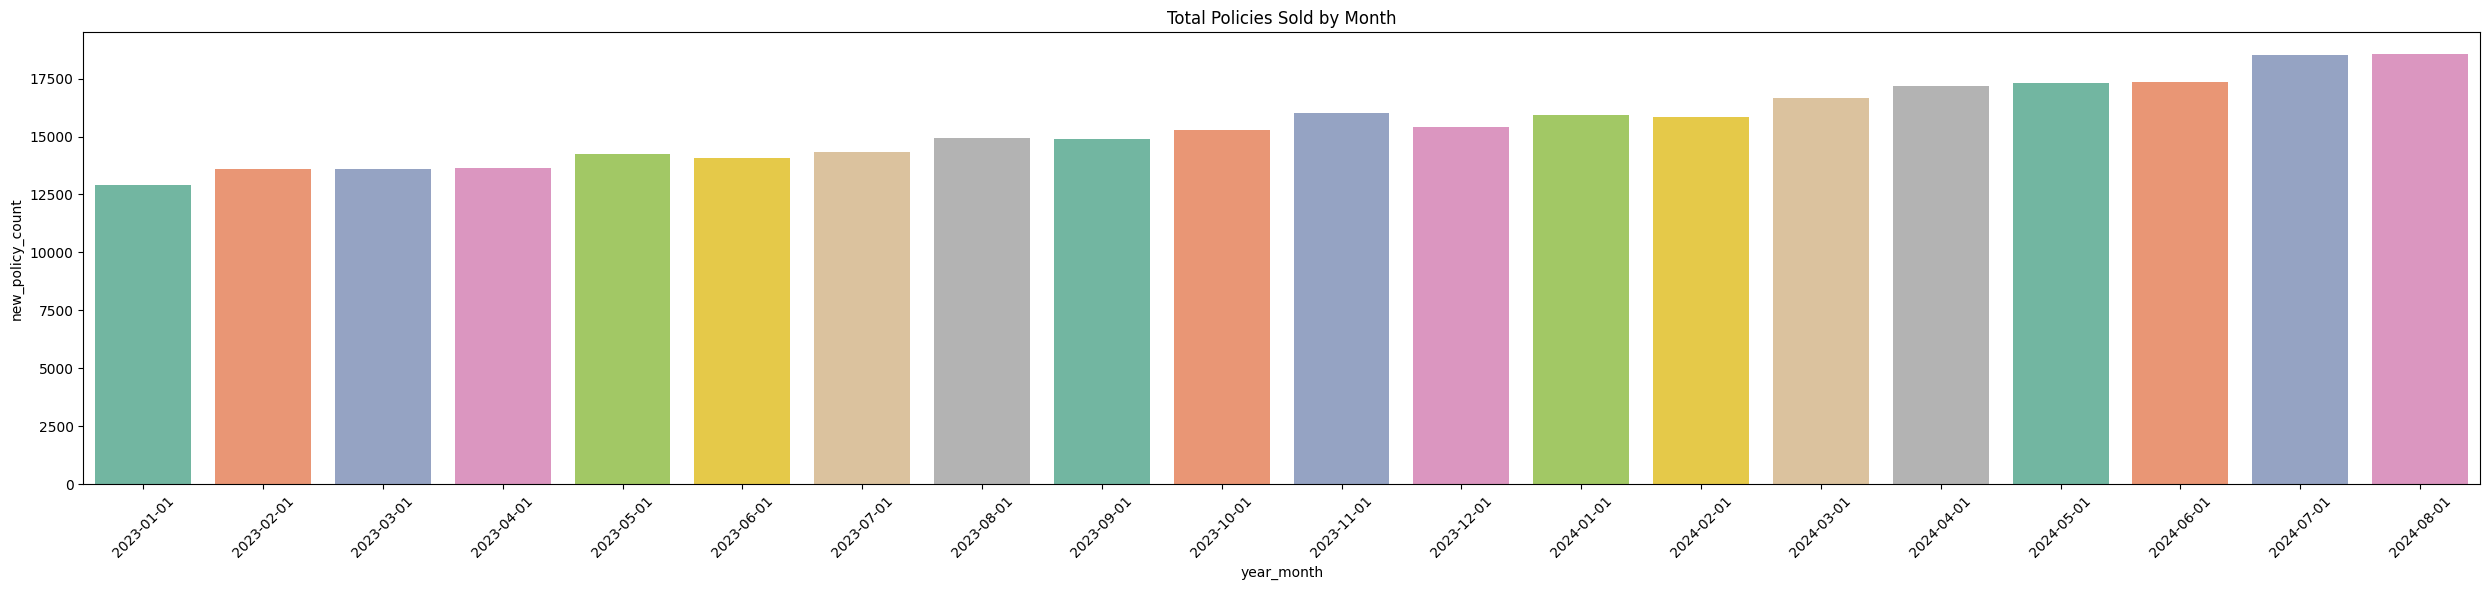

In [25]:
monthly_policy_sales = df.groupby('year_month')['new_policy_count'].sum().reset_index()

plt.figure(figsize=(25, 6))
sns.barplot(x='year_month', y='new_policy_count', data=monthly_policy_sales, palette='Set2')
plt.title('Total Policies Sold by Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The analysis indicates a consistent month-over-month increase in the number of policies sold.

### Correlation heatmap of all the feataures

Text(0.5, 1.0, 'Correlation Heatmap')

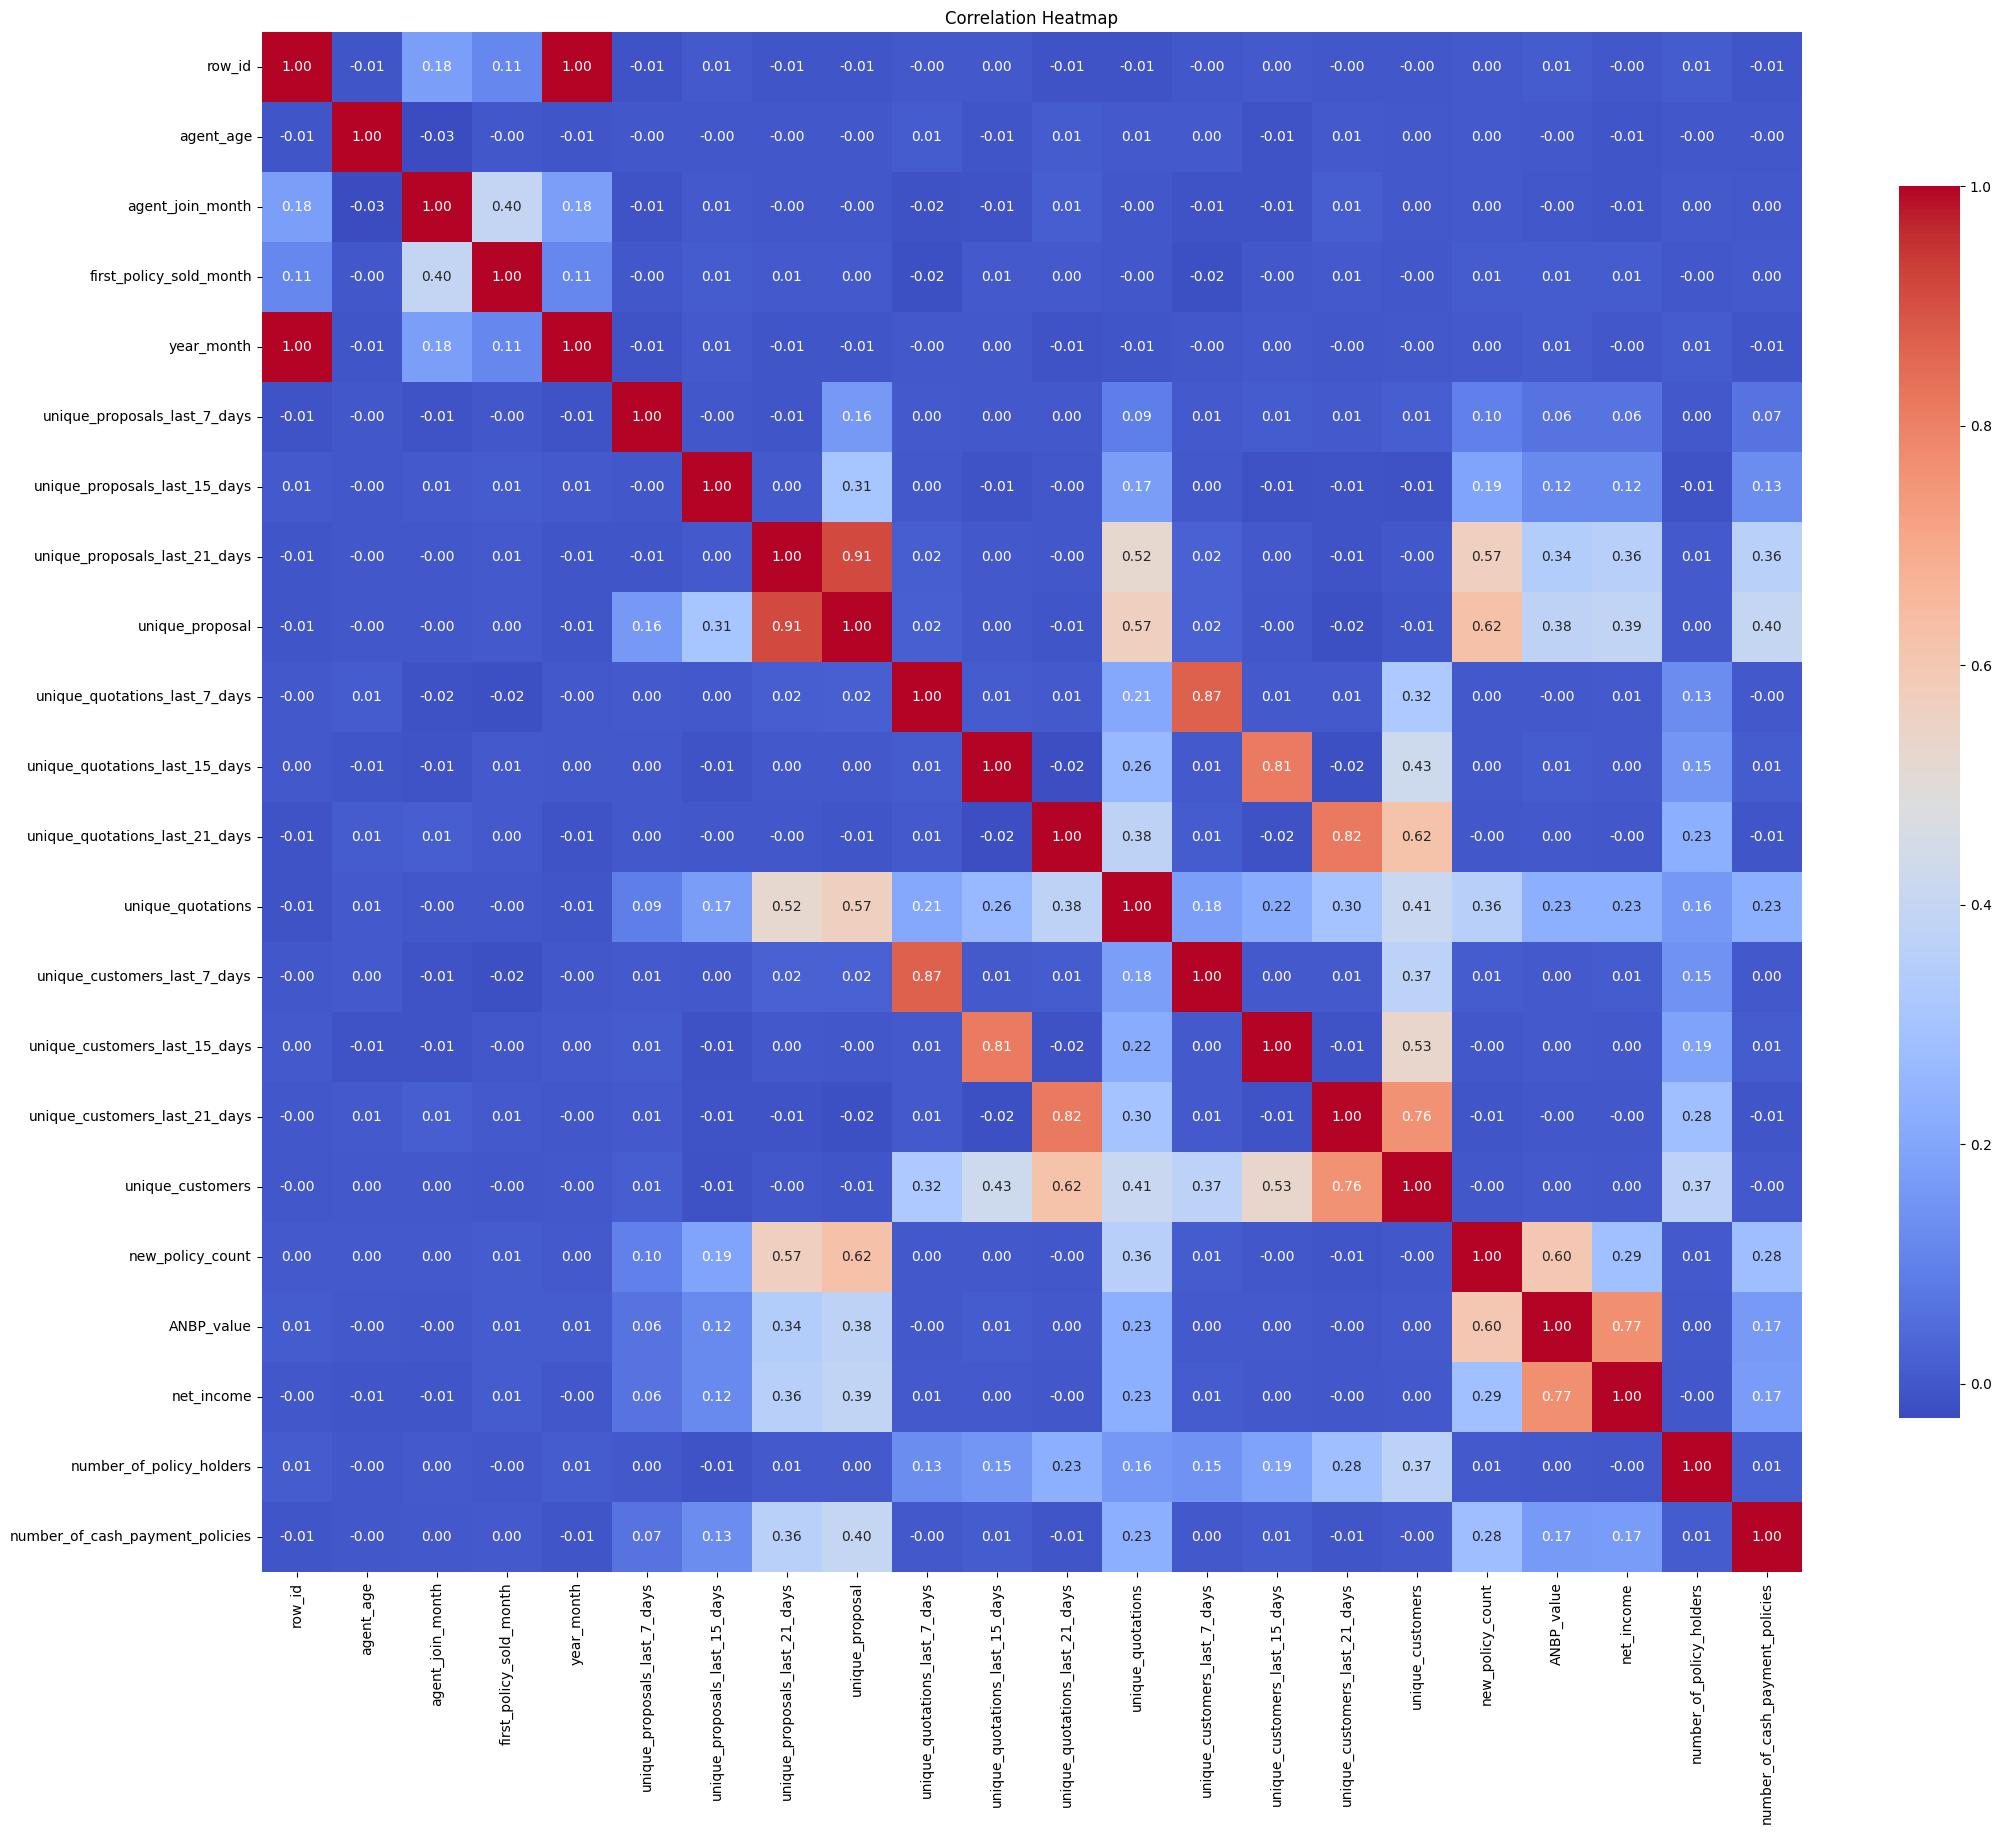

In [26]:
df_corr = df.drop("agent_code", axis=1)
corr = df_corr.corr()
plt.figure(figsize=(25, 20))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')

Demographic features appear to have minimal influence on the outcomes. Key factors contributing to the results include `net_income`, `new_policy_count`, `ANBP_value`, and `unique_customers_last_21_days`. This observation was derived from the correlation heatmap analysis.


In [34]:
df.dtypes

row_id                                      int64
agent_code                                 object
agent_age                                   int64
agent_join_month                   datetime64[ns]
first_policy_sold_month            datetime64[ns]
year_month                         datetime64[ns]
unique_proposals_last_7_days                int64
unique_proposals_last_15_days               int64
unique_proposals_last_21_days               int64
unique_proposal                             int64
unique_quotations_last_7_days               int64
unique_quotations_last_15_days              int64
unique_quotations_last_21_days              int64
unique_quotations                           int64
unique_customers_last_7_days                int64
unique_customers_last_15_days               int64
unique_customers_last_21_days               int64
unique_customers                            int64
new_policy_count                            int64
ANBP_value                                  int64


### Comparison of Best and Worst agents on new_policy_count. 
combining the top 20 and worst 20 agents into a single DataFrame, adding a 'Category' column to distinguish between them, and visualizing the comparison using a bar chart. The chart highlights the differences in `new_policy_count` between the top-performing and least-performing agents.

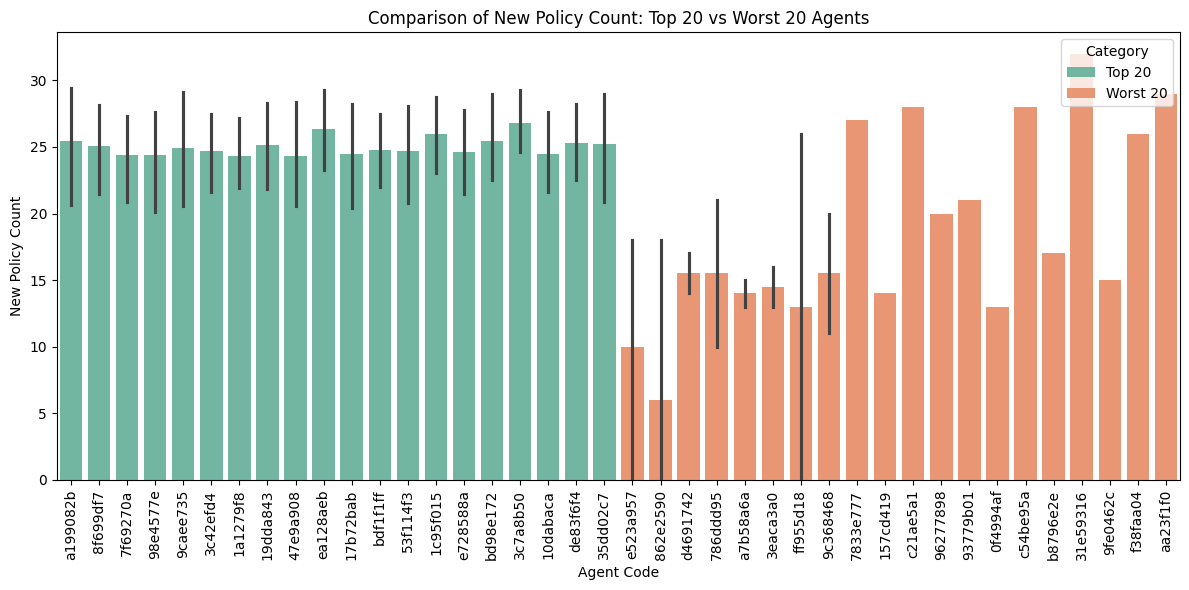

In [29]:
top_20_agents = df.groupby('agent_code')['new_policy_count'].sum().reset_index().sort_values(by='new_policy_count', ascending=False).head(20)


worst_20_agents = df.groupby('agent_code')['new_policy_count'].sum().reset_index().sort_values(by='new_policy_count', ascending=False).tail(20)

top_20_agents = df[df['agent_code'].isin(top_20_agents['agent_code'])]
worst_20_agents = df[df['agent_code'].isin(worst_20_agents['agent_code'])]



# Combine top 20 and worst 20 agents into one DataFrame
combined_agents = pd.concat([top_20_agents, worst_20_agents])

# Add a label column to distinguish between top and worst agents
combined_agents['Category'] = ['Top 20'] * len(top_20_agents) + ['Worst 20'] * len(worst_20_agents)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='agent_code', y='new_policy_count', hue='Category', data=combined_agents, palette='Set2')
plt.title('Comparison of New Policy Count: Top 20 vs Worst 20 Agents')
plt.xlabel('Agent Code')
plt.ylabel('New Policy Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_14464\1035937384.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents, palette='Set2')


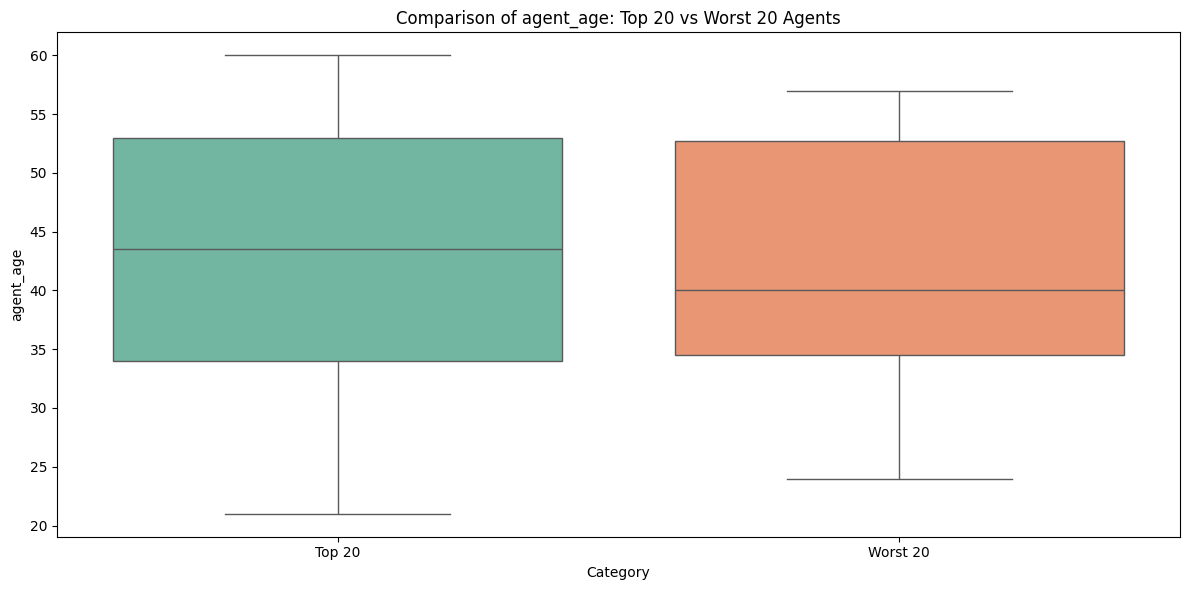

C:\Users\User\AppData\Local\Temp\ipykernel_14464\1035937384.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents, palette='Set2')


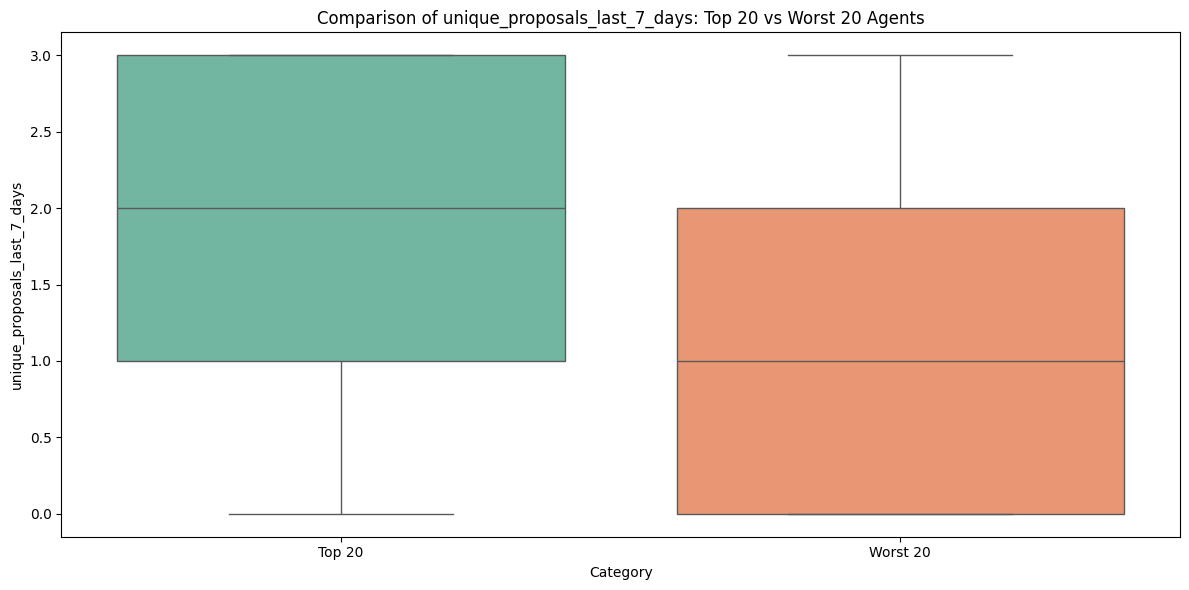

C:\Users\User\AppData\Local\Temp\ipykernel_14464\1035937384.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents, palette='Set2')


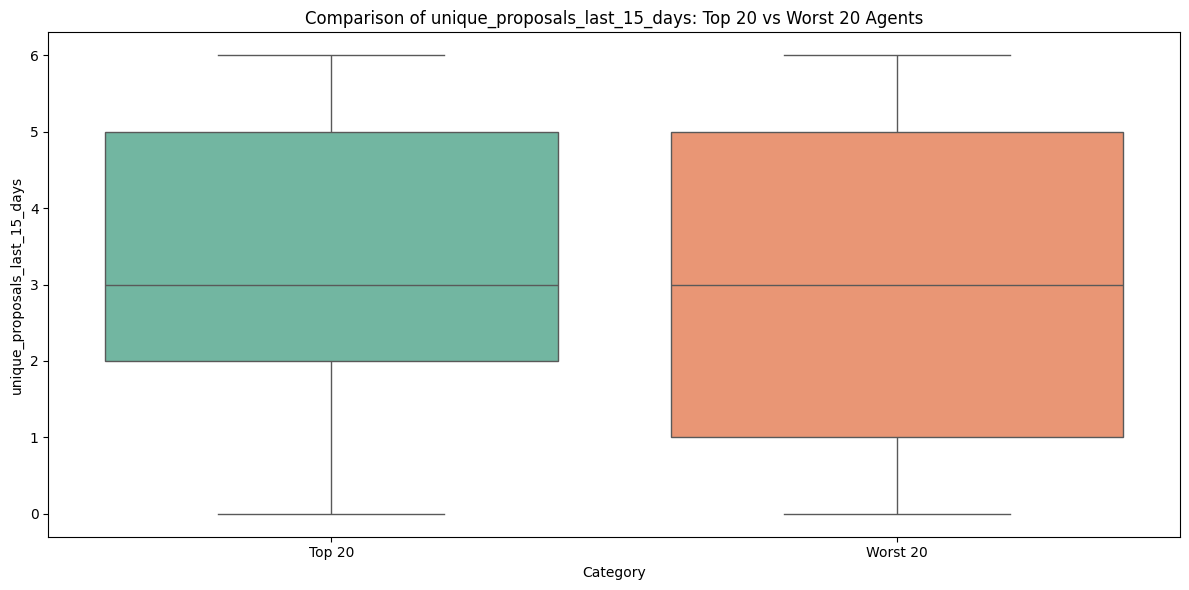

C:\Users\User\AppData\Local\Temp\ipykernel_14464\1035937384.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents, palette='Set2')


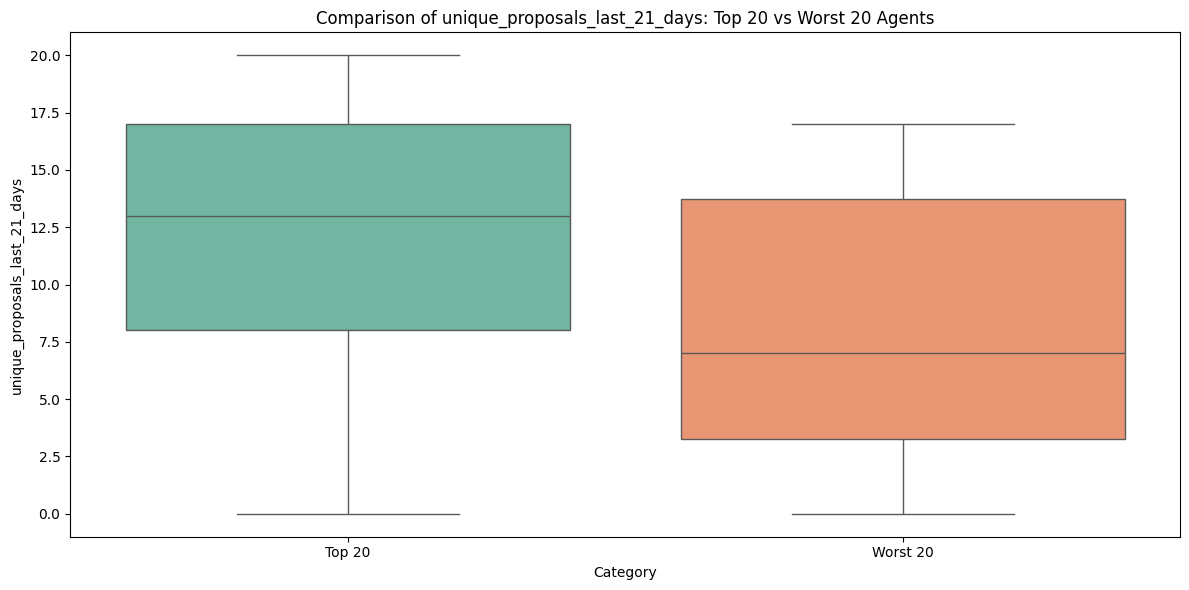

C:\Users\User\AppData\Local\Temp\ipykernel_14464\1035937384.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents, palette='Set2')


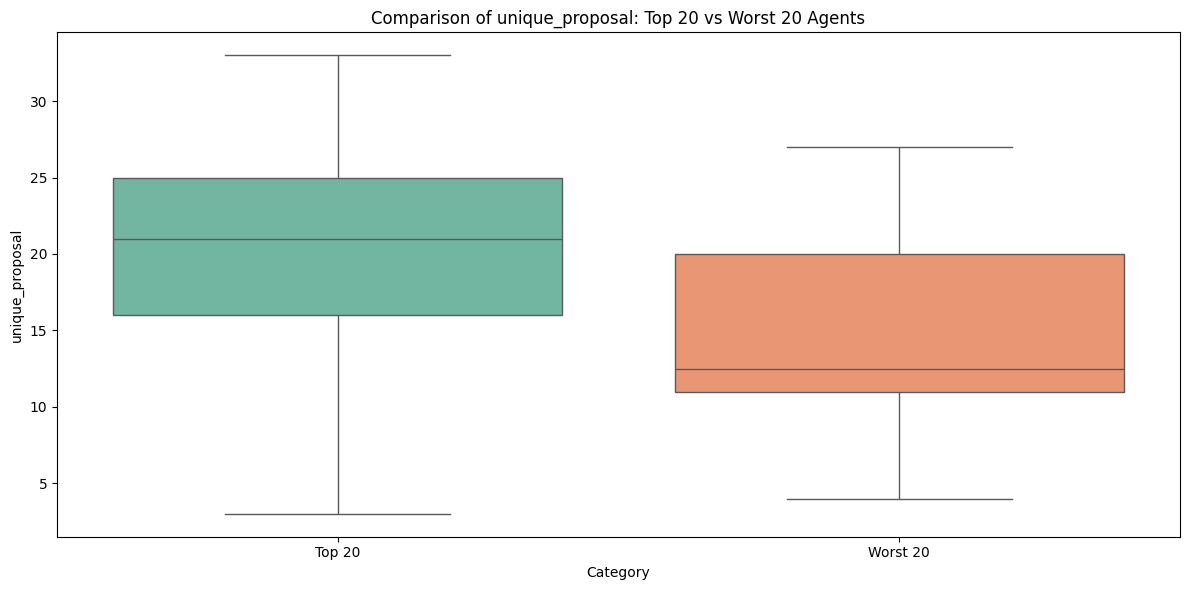

C:\Users\User\AppData\Local\Temp\ipykernel_14464\1035937384.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents, palette='Set2')


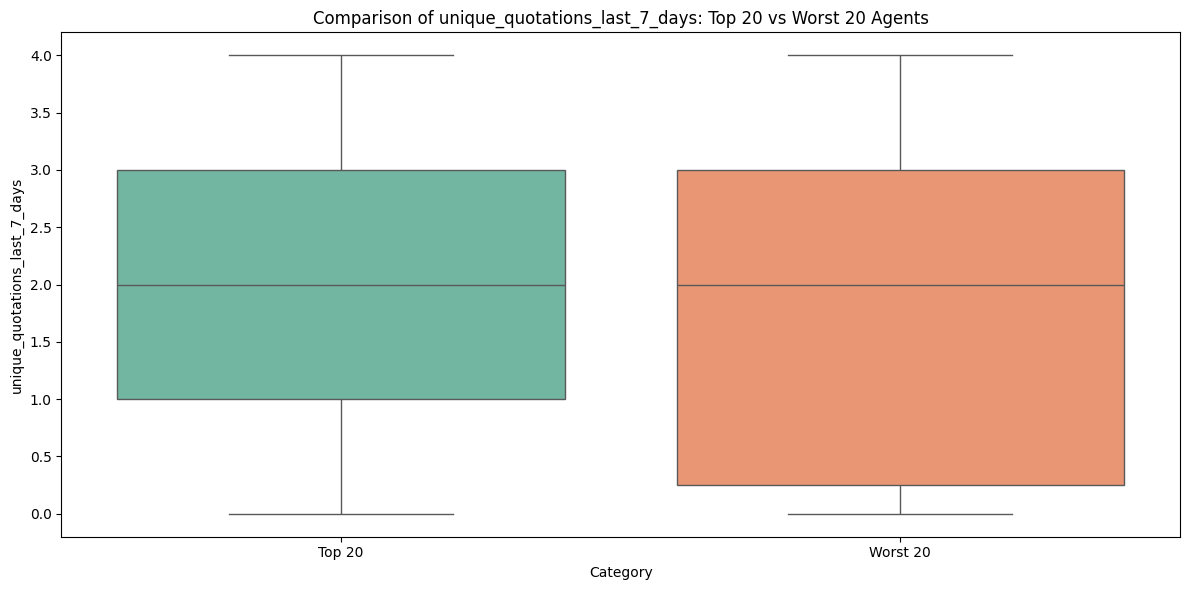

C:\Users\User\AppData\Local\Temp\ipykernel_14464\1035937384.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents, palette='Set2')


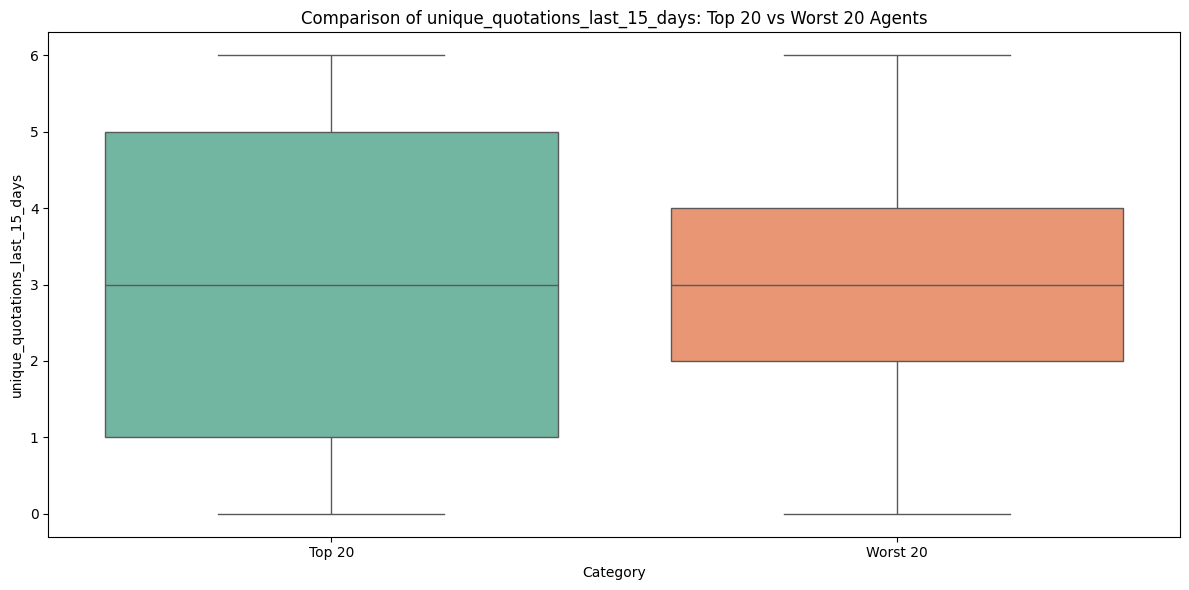

C:\Users\User\AppData\Local\Temp\ipykernel_14464\1035937384.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents, palette='Set2')


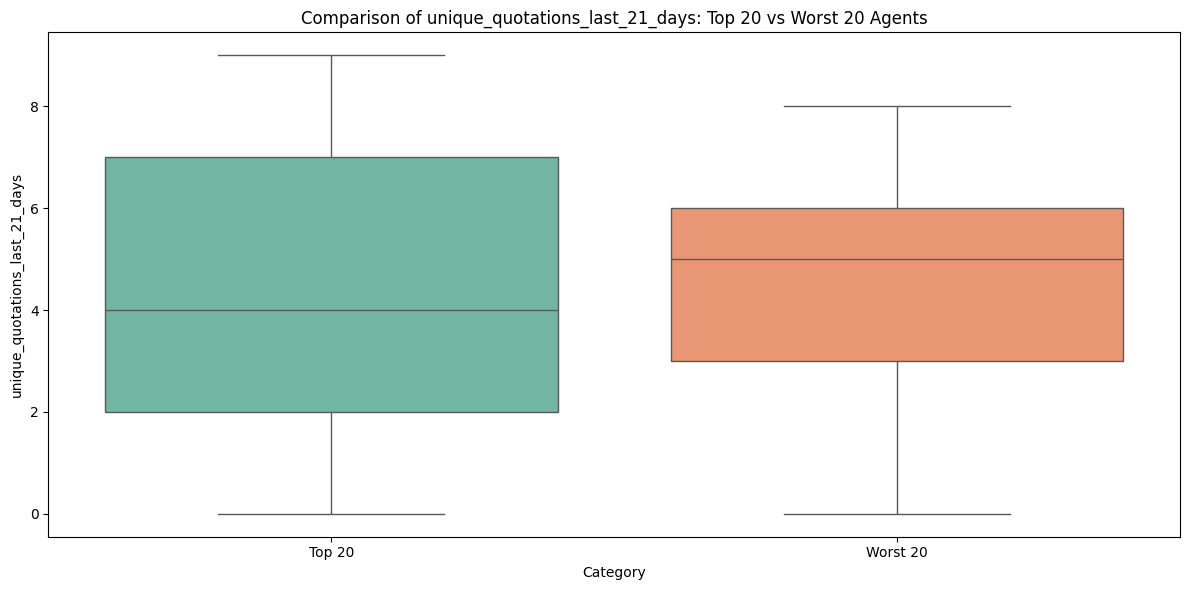

C:\Users\User\AppData\Local\Temp\ipykernel_14464\1035937384.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents, palette='Set2')


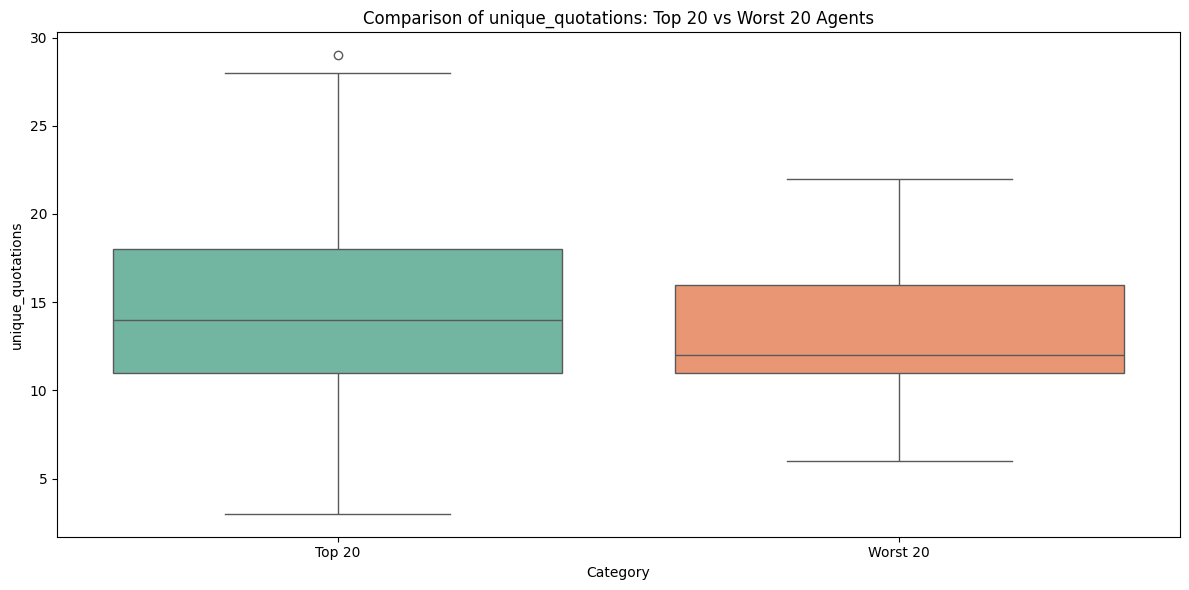

C:\Users\User\AppData\Local\Temp\ipykernel_14464\1035937384.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents, palette='Set2')


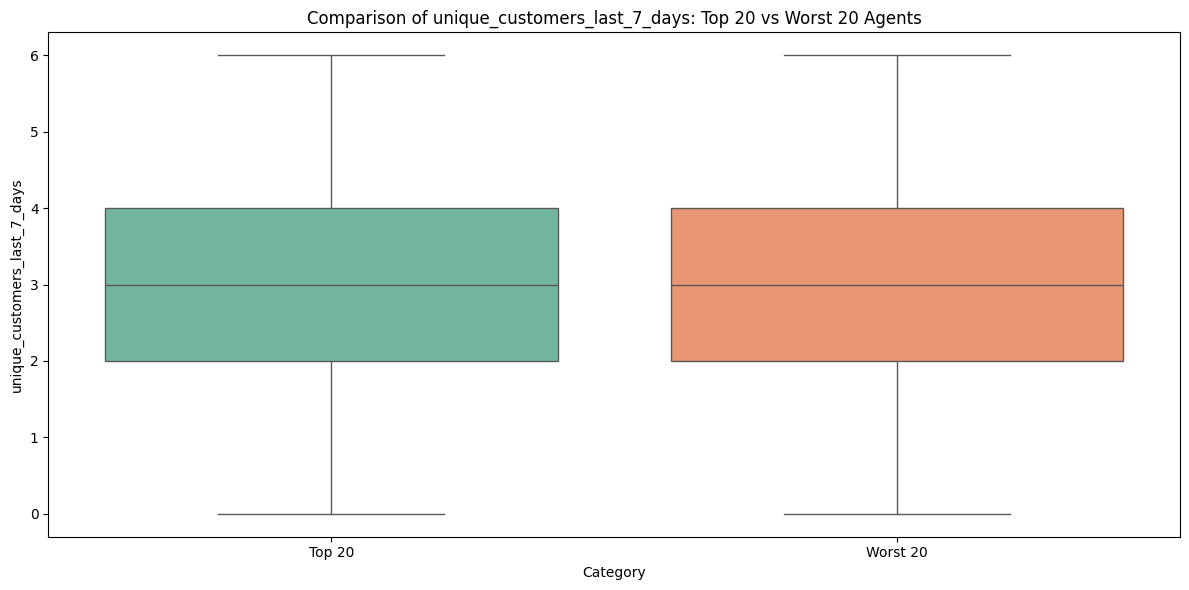

C:\Users\User\AppData\Local\Temp\ipykernel_14464\1035937384.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents, palette='Set2')


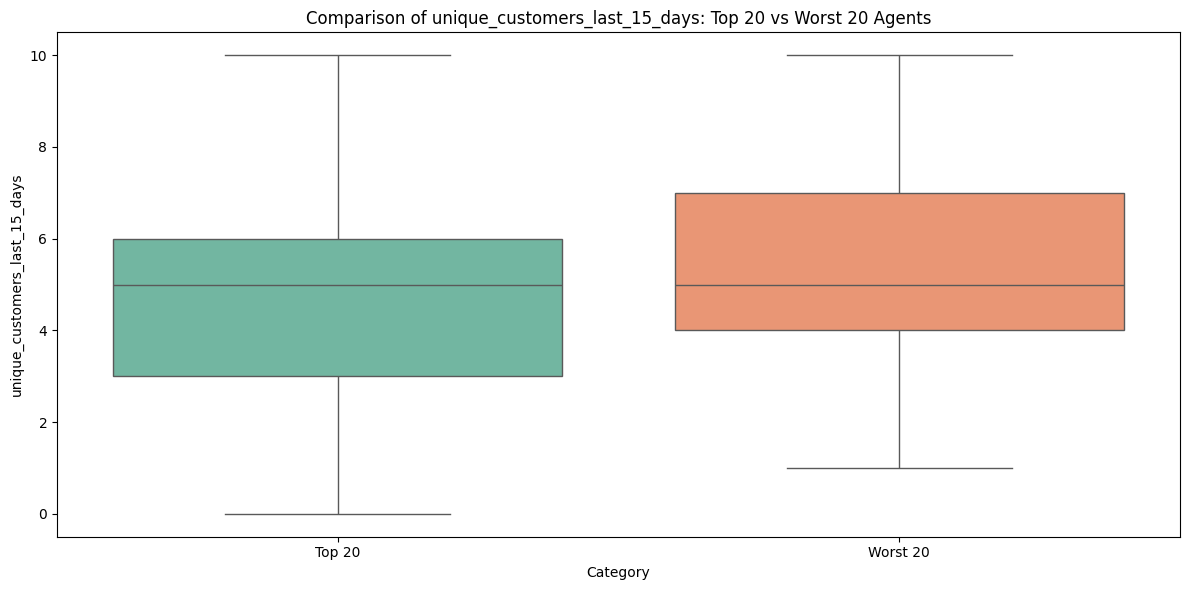

C:\Users\User\AppData\Local\Temp\ipykernel_14464\1035937384.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents, palette='Set2')


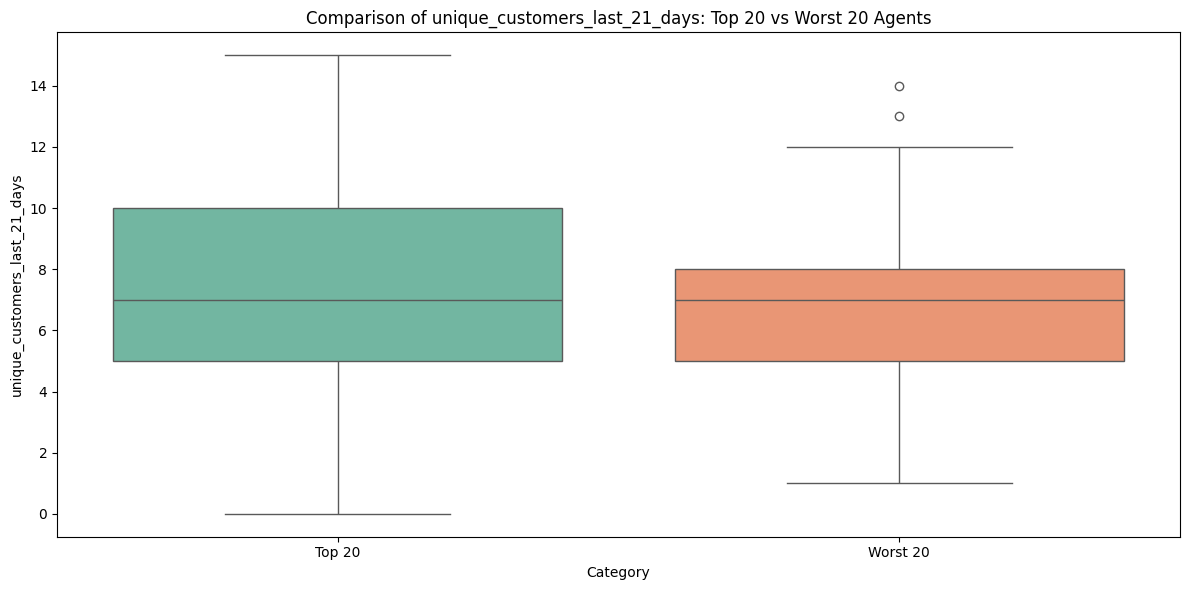

C:\Users\User\AppData\Local\Temp\ipykernel_14464\1035937384.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents, palette='Set2')


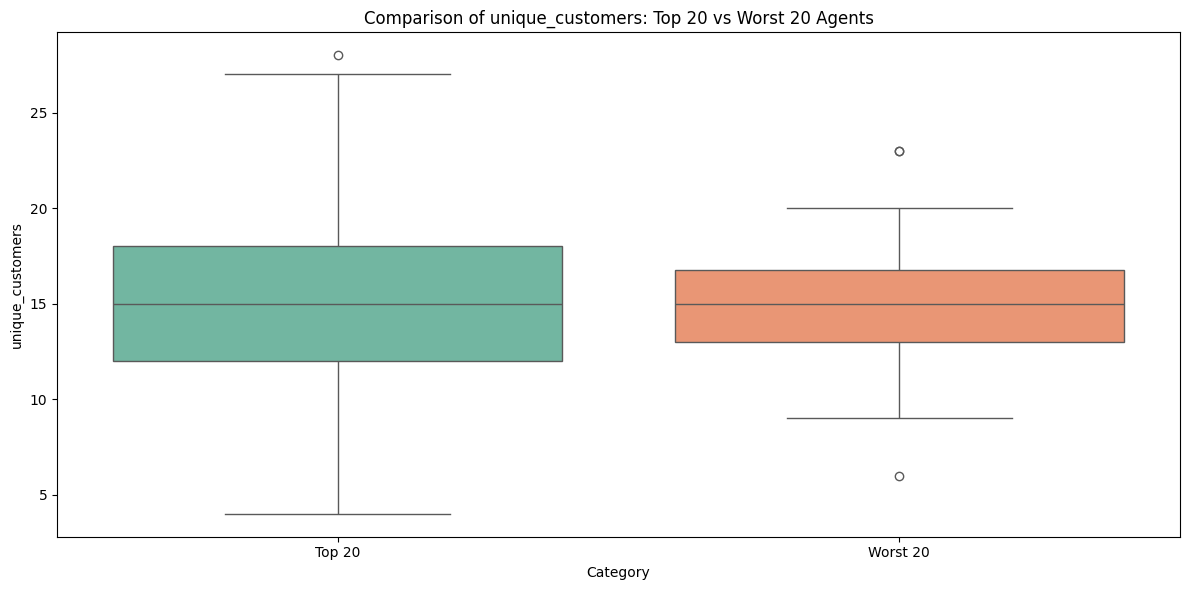

C:\Users\User\AppData\Local\Temp\ipykernel_14464\1035937384.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents, palette='Set2')


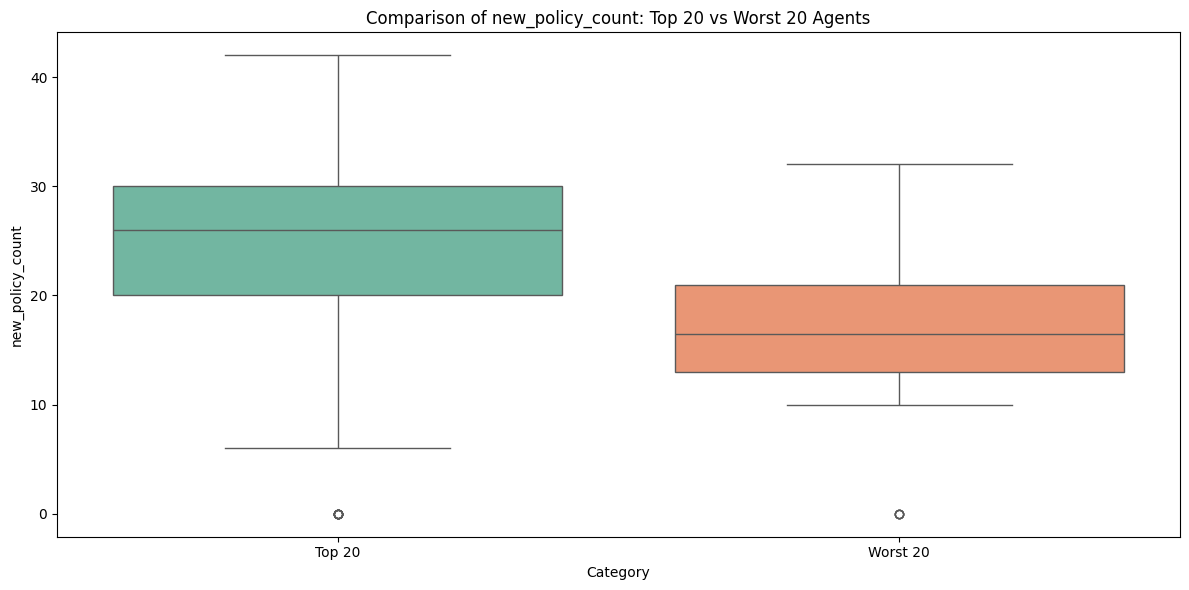

C:\Users\User\AppData\Local\Temp\ipykernel_14464\1035937384.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents, palette='Set2')


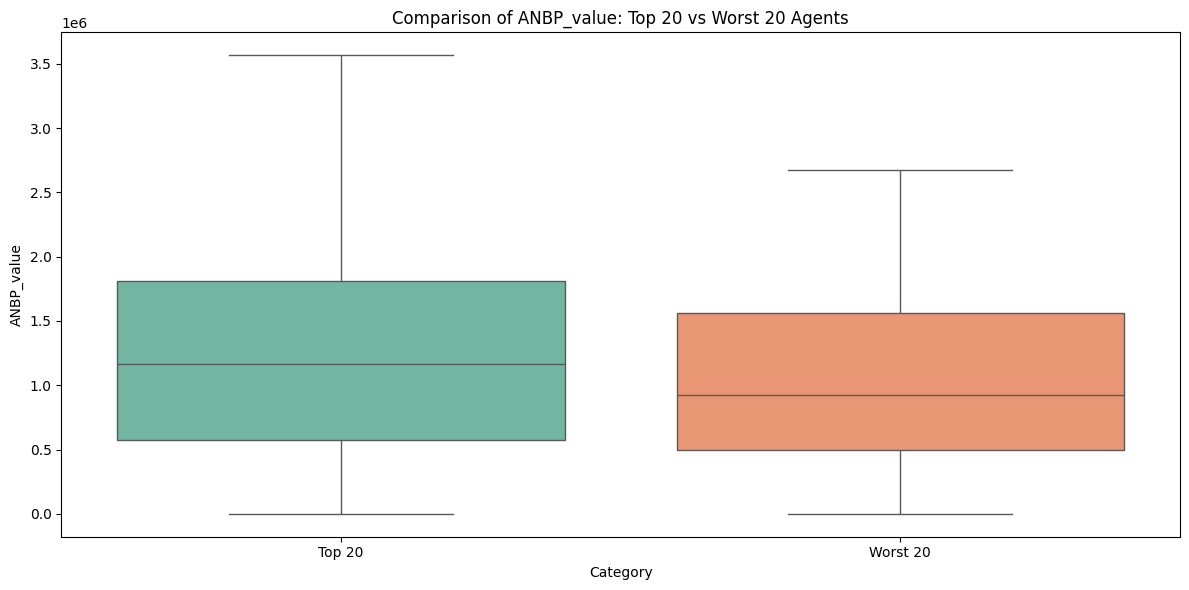

C:\Users\User\AppData\Local\Temp\ipykernel_14464\1035937384.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents, palette='Set2')


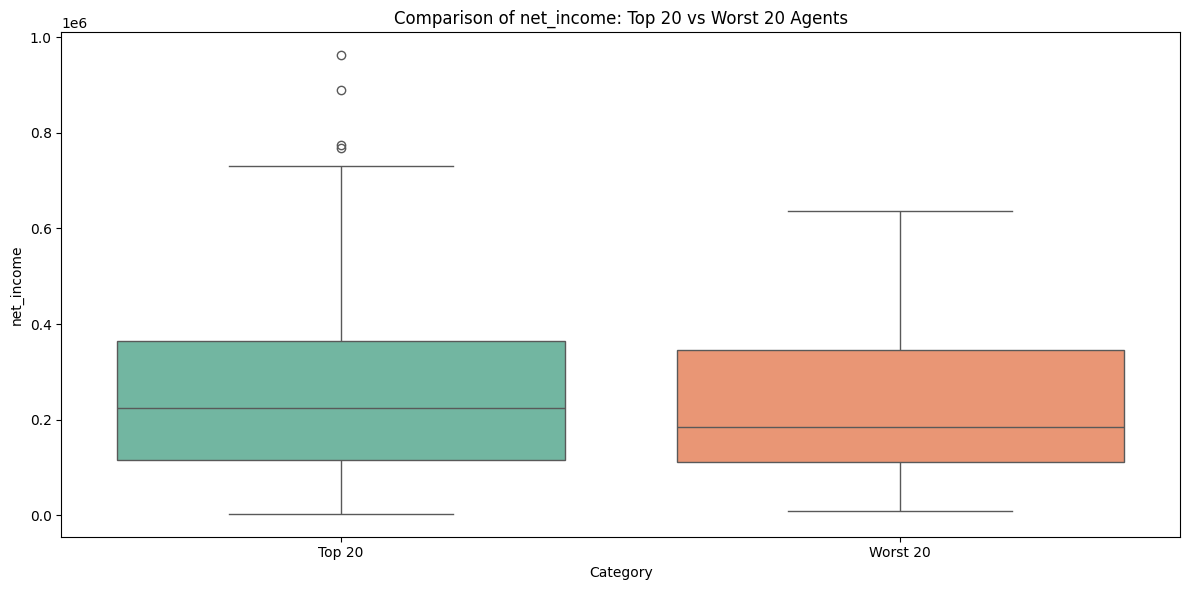

C:\Users\User\AppData\Local\Temp\ipykernel_14464\1035937384.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents, palette='Set2')


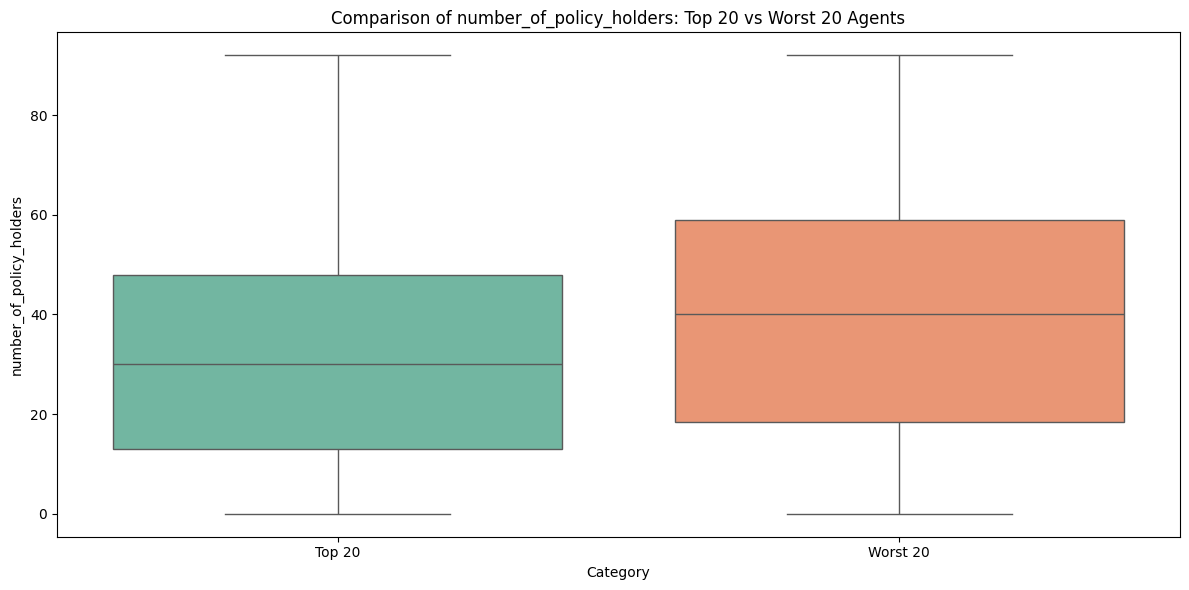

C:\Users\User\AppData\Local\Temp\ipykernel_14464\1035937384.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents, palette='Set2')


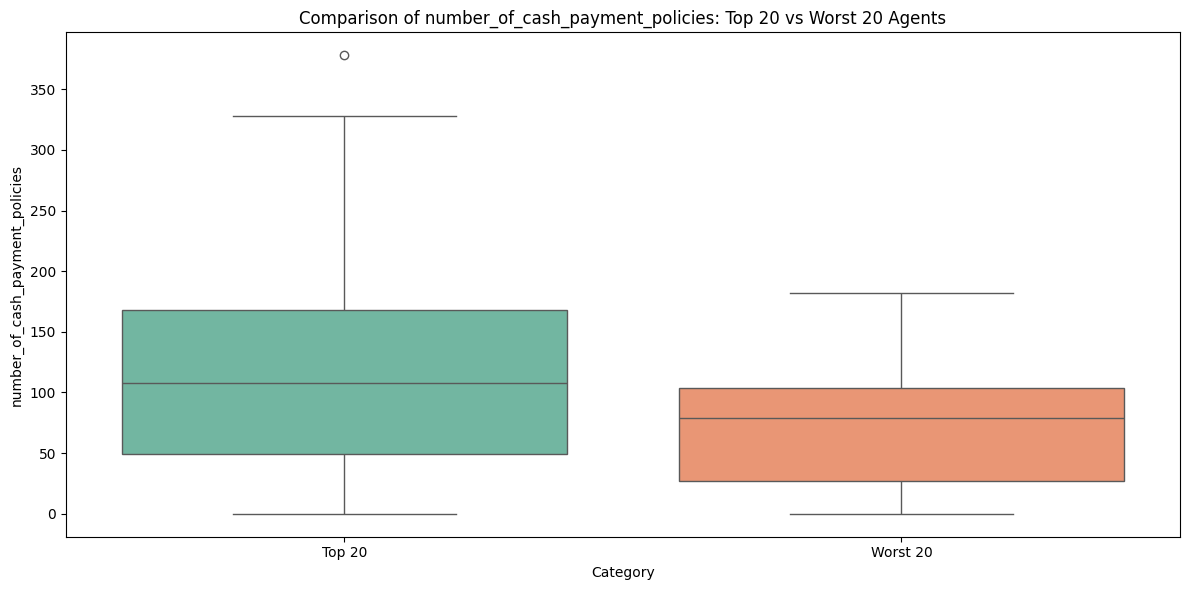

In [30]:
# Drop non-numeric or ID columns
exclude = ['row_id', 'agent_code', 'agent_join_month', 'first_policy_sold_month', 'year_month']
numerical_cols = [col for col in combined_agents.columns if combined_agents[col].dtype != 'object' and col not in exclude]

# Plot boxplots for each numerical feature
for col in numerical_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Category', y=col, data=combined_agents, palette='Set2')
    plt.title(f'Comparison of {col}: Top 20 vs Worst 20 Agents')
    plt.xlabel('Category')
    plt.ylabel(col) 
    plt.tight_layout()
    plt.show()

### Comparison of Best and Worst agents on net_income. 
Combining the top 20 and worst 20 agents into a single DataFrame, adding a 'Category' column to distinguish between them, and visualizing the comparison using a bar chart. The chart highlights the differences in `net_income` between the top-performing and least-performing agents.

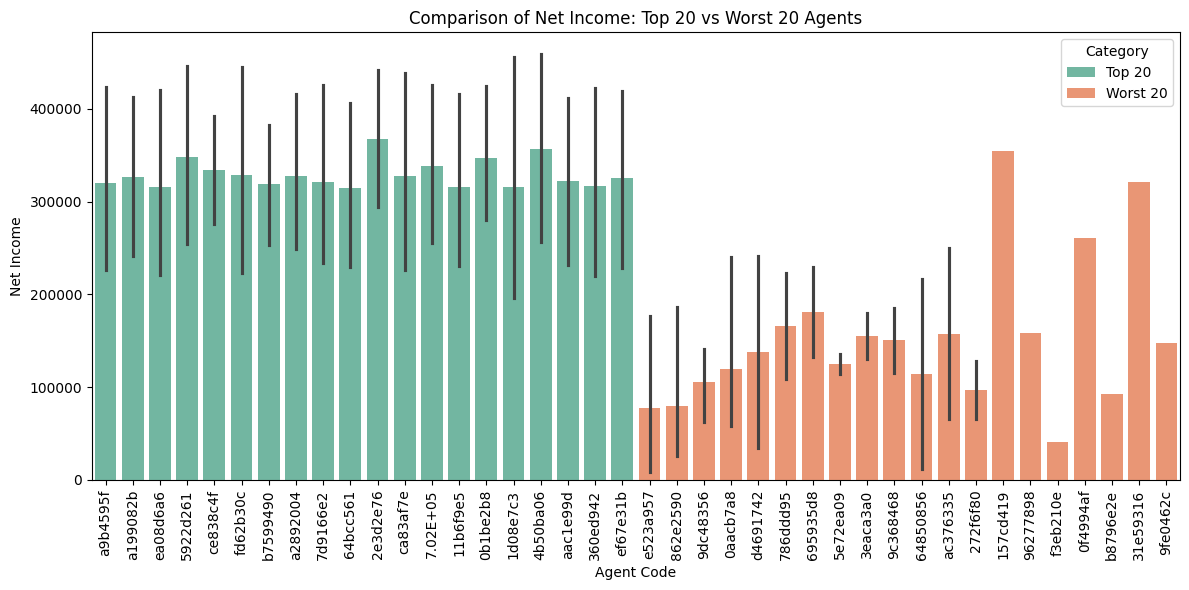

In [31]:
top_earning_agents = df.groupby('agent_code')['net_income'].sum().reset_index().sort_values(by='net_income', ascending=False).head(20)


worst_earning_agents = df.groupby('agent_code')['net_income'].sum().reset_index().sort_values(by='net_income', ascending=False).tail(20)

top_earning_agents = df[df['agent_code'].isin(top_earning_agents['agent_code'])]
worst_earning_agents = df[df['agent_code'].isin(worst_earning_agents['agent_code'])]


# Combine top 20 and worst 20 agents into one DataFrame
combined_agents_earning = pd.concat([top_earning_agents, worst_earning_agents])

# Add a label column to distinguish between top and worst agents
combined_agents_earning['Category'] = ['Top 20'] * len(top_earning_agents) + ['Worst 20'] * len(worst_earning_agents)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='agent_code', y='net_income', hue='Category', data=combined_agents_earning, palette='Set2')
plt.title('Comparison of Net Income: Top 20 vs Worst 20 Agents')
plt.xlabel('Agent Code')
plt.ylabel('Net Income')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_14464\47637500.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents_earning, palette='Set2')


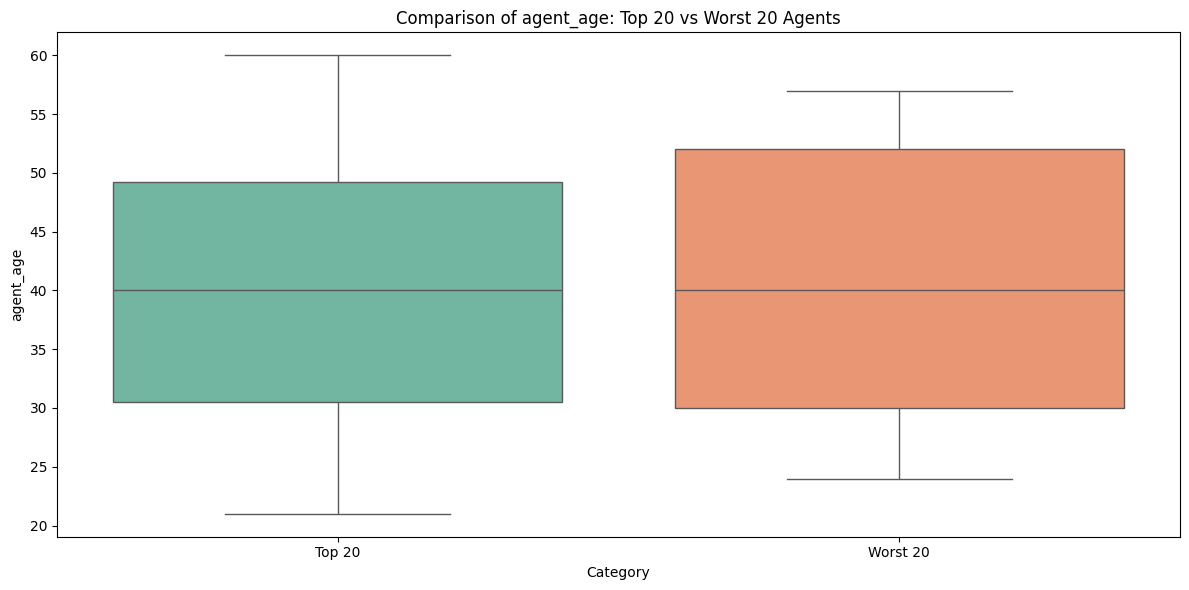

C:\Users\User\AppData\Local\Temp\ipykernel_14464\47637500.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents_earning, palette='Set2')


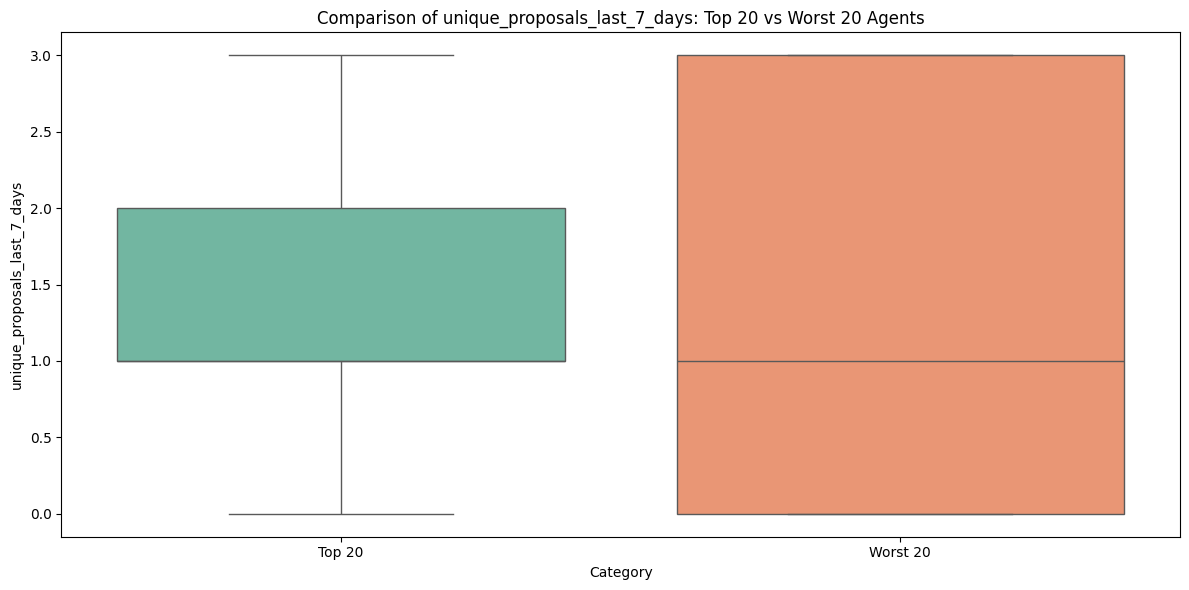

C:\Users\User\AppData\Local\Temp\ipykernel_14464\47637500.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents_earning, palette='Set2')


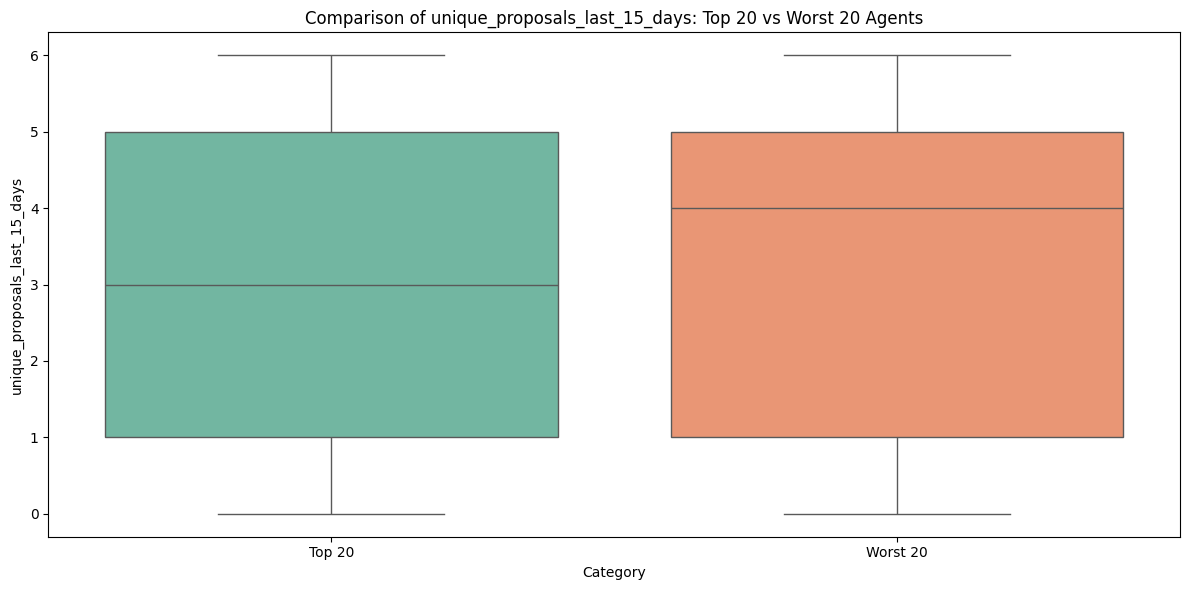

C:\Users\User\AppData\Local\Temp\ipykernel_14464\47637500.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents_earning, palette='Set2')


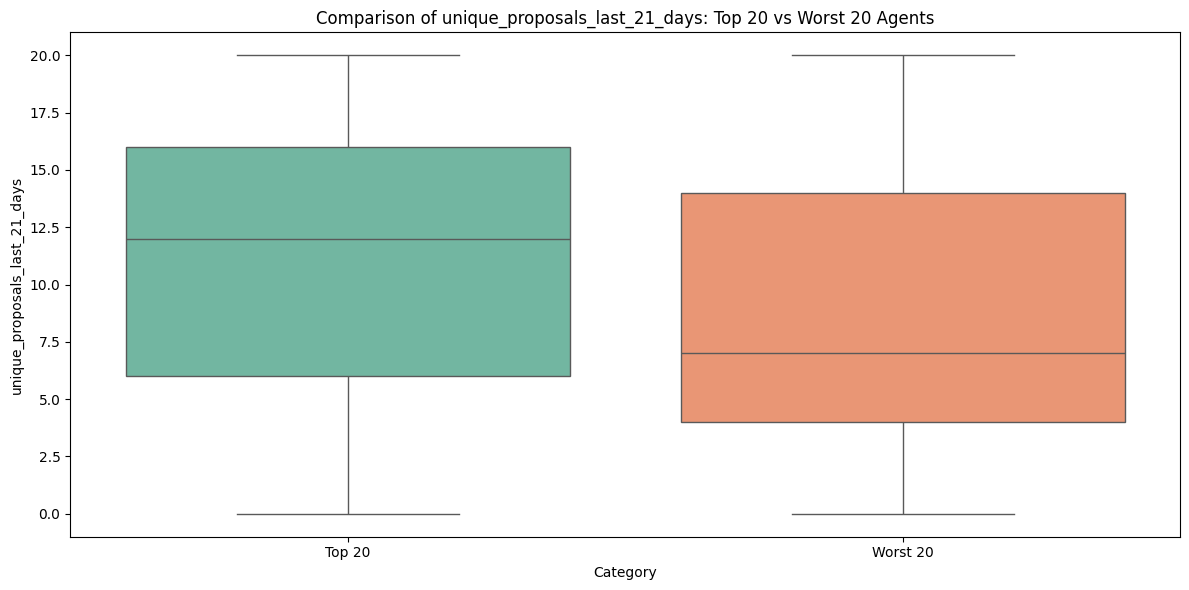

C:\Users\User\AppData\Local\Temp\ipykernel_14464\47637500.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents_earning, palette='Set2')


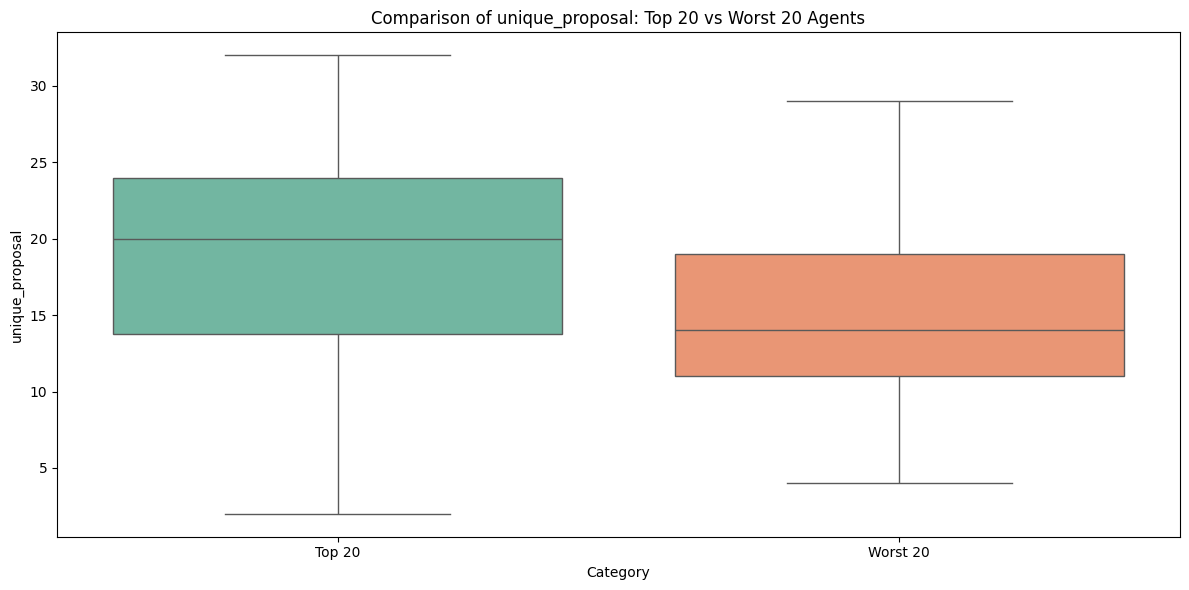

C:\Users\User\AppData\Local\Temp\ipykernel_14464\47637500.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents_earning, palette='Set2')


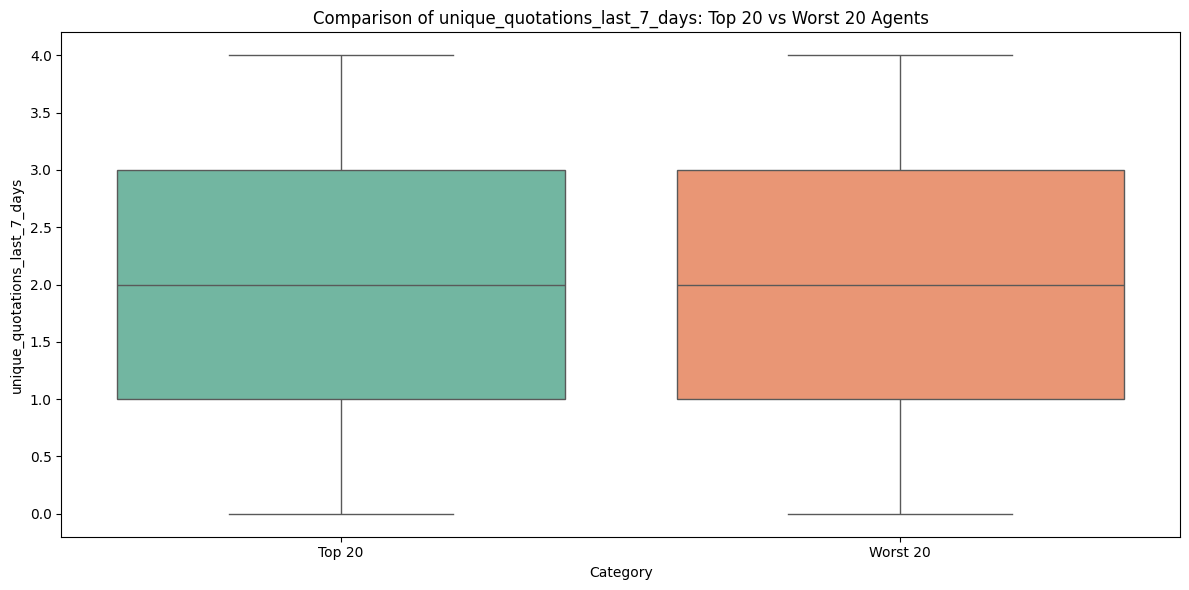

C:\Users\User\AppData\Local\Temp\ipykernel_14464\47637500.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents_earning, palette='Set2')


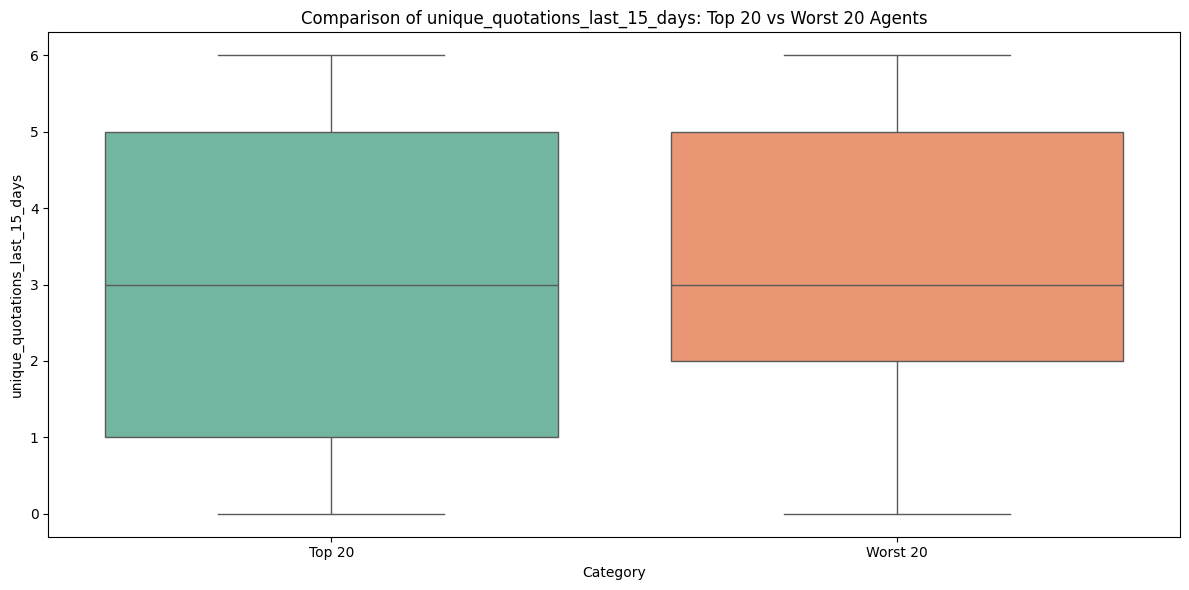

C:\Users\User\AppData\Local\Temp\ipykernel_14464\47637500.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents_earning, palette='Set2')


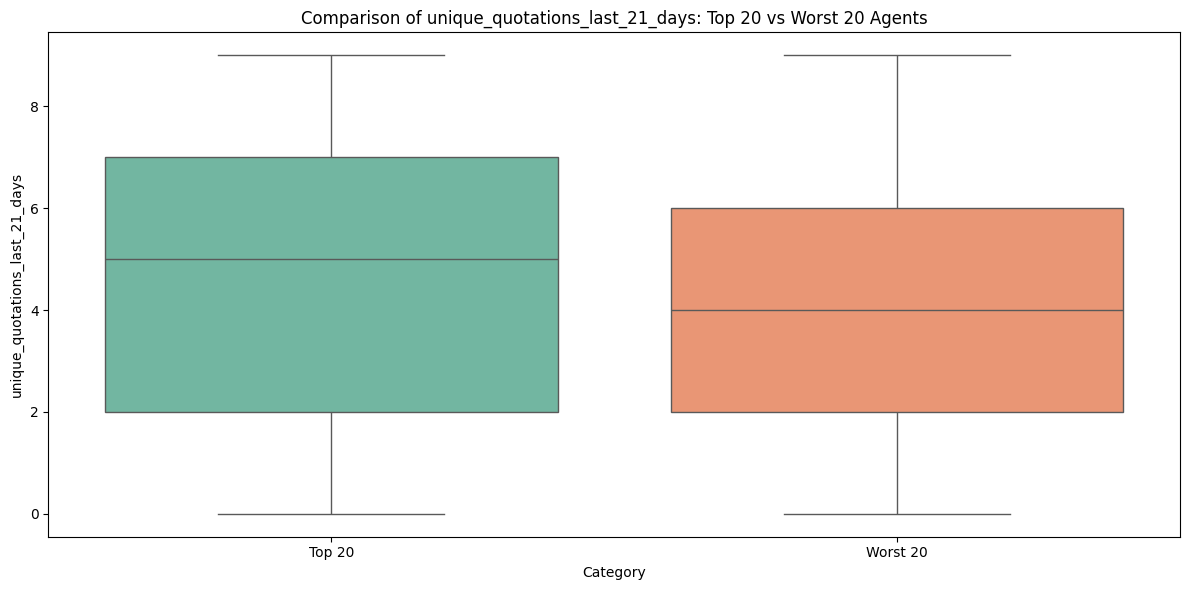

C:\Users\User\AppData\Local\Temp\ipykernel_14464\47637500.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents_earning, palette='Set2')


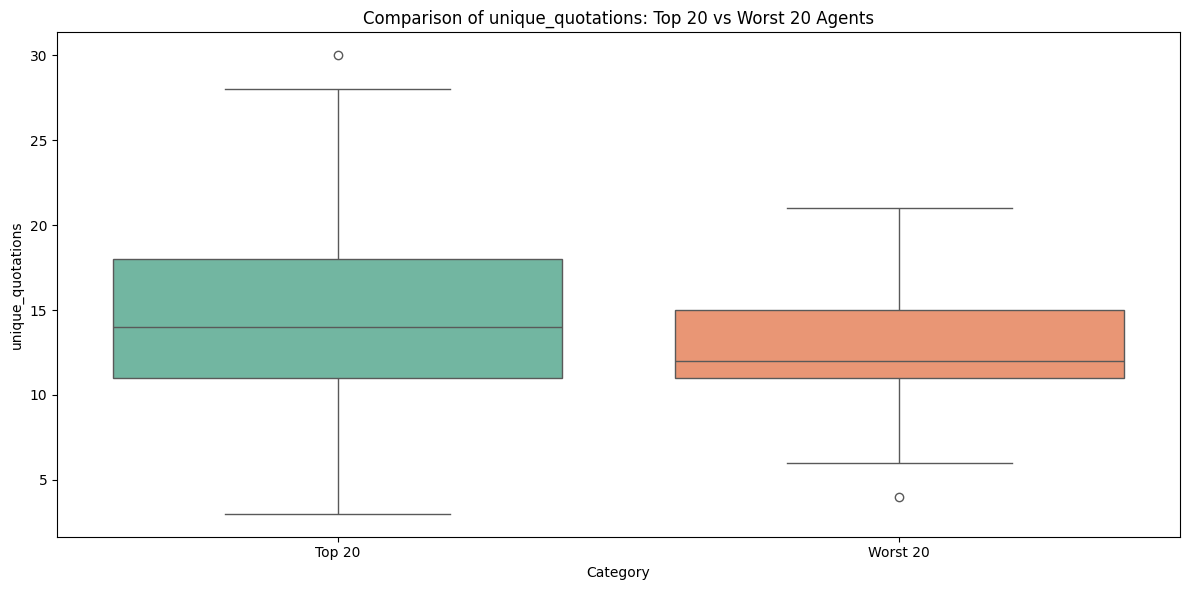

C:\Users\User\AppData\Local\Temp\ipykernel_14464\47637500.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents_earning, palette='Set2')


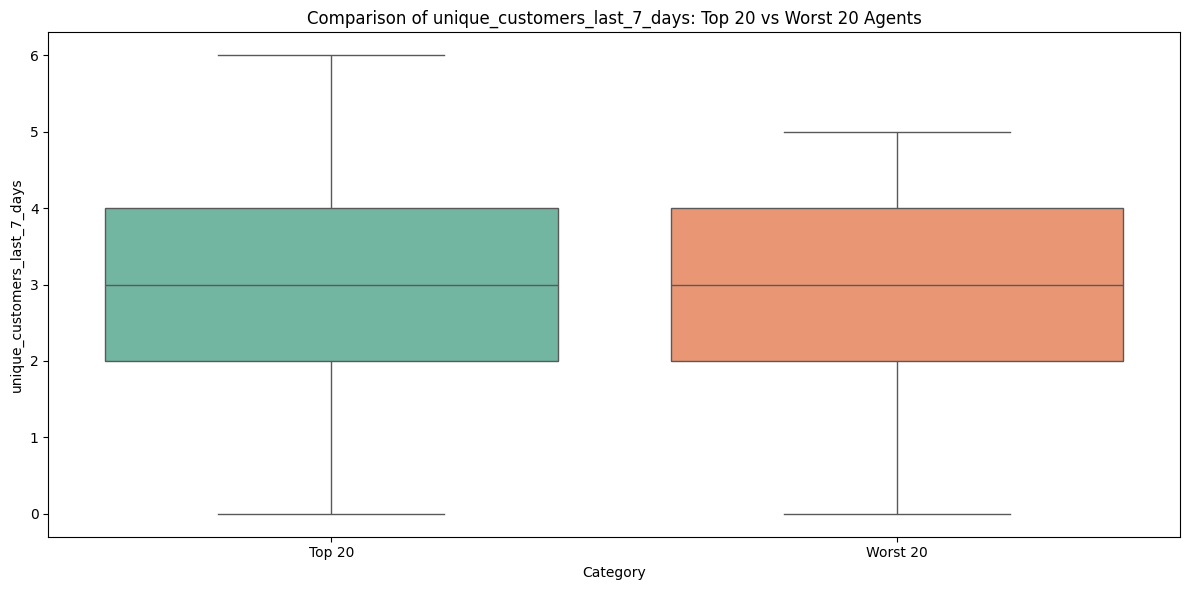

C:\Users\User\AppData\Local\Temp\ipykernel_14464\47637500.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents_earning, palette='Set2')


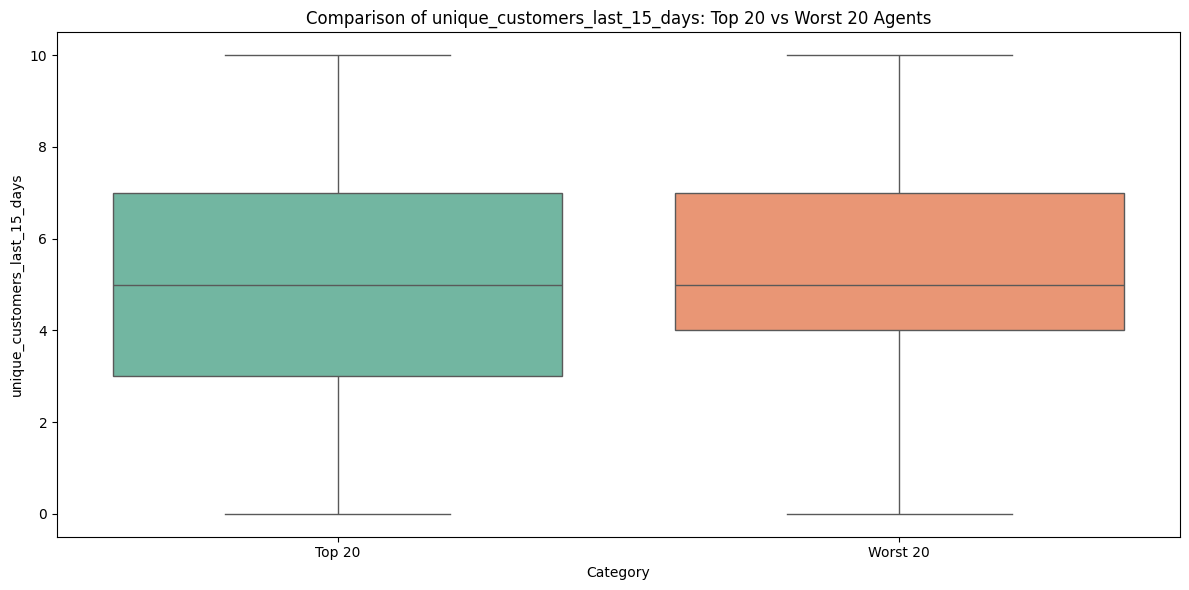

C:\Users\User\AppData\Local\Temp\ipykernel_14464\47637500.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents_earning, palette='Set2')


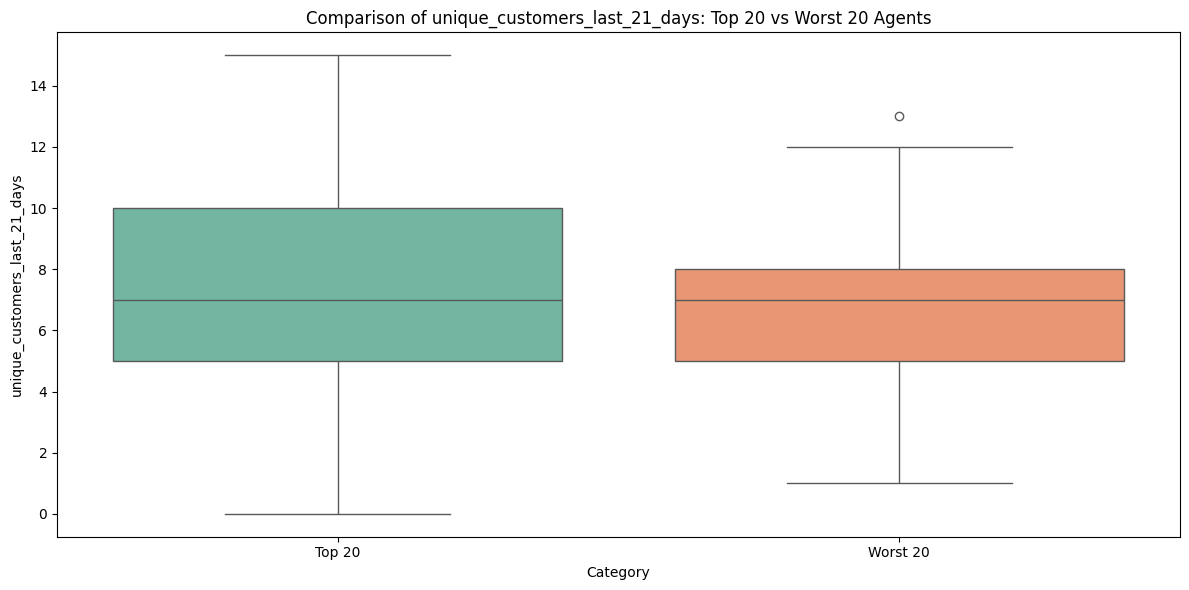

C:\Users\User\AppData\Local\Temp\ipykernel_14464\47637500.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents_earning, palette='Set2')


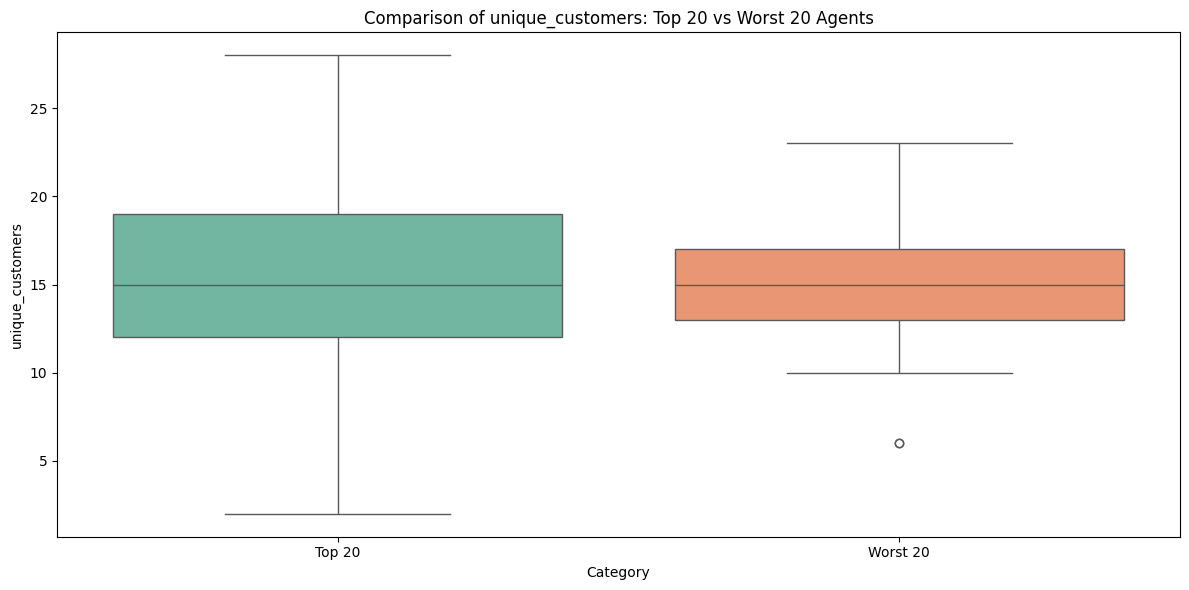

C:\Users\User\AppData\Local\Temp\ipykernel_14464\47637500.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents_earning, palette='Set2')


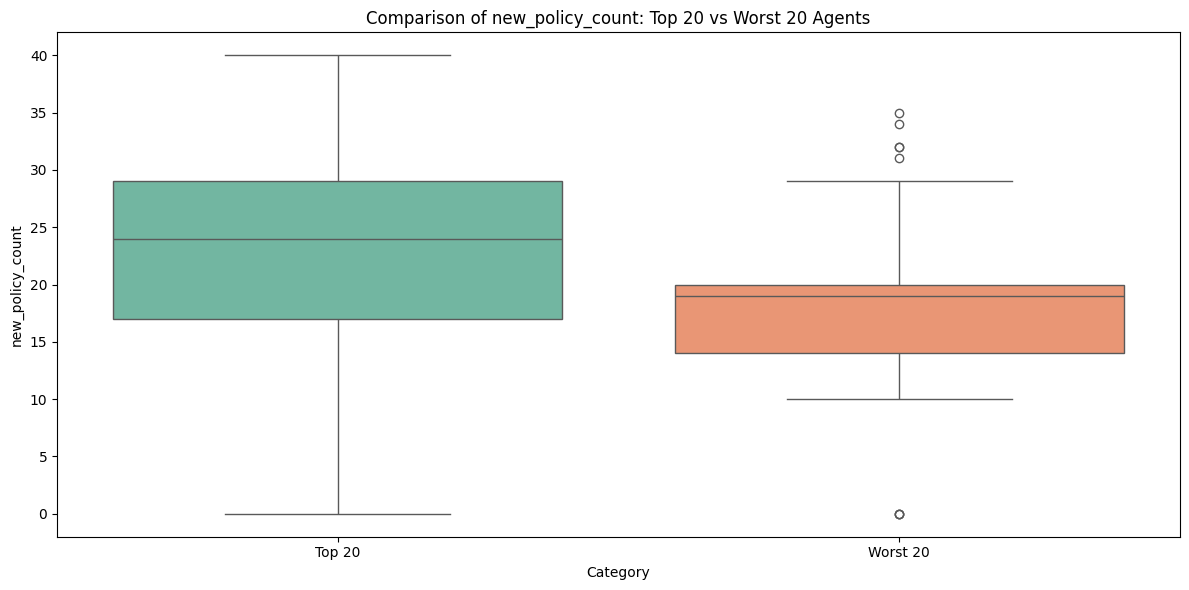

C:\Users\User\AppData\Local\Temp\ipykernel_14464\47637500.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents_earning, palette='Set2')


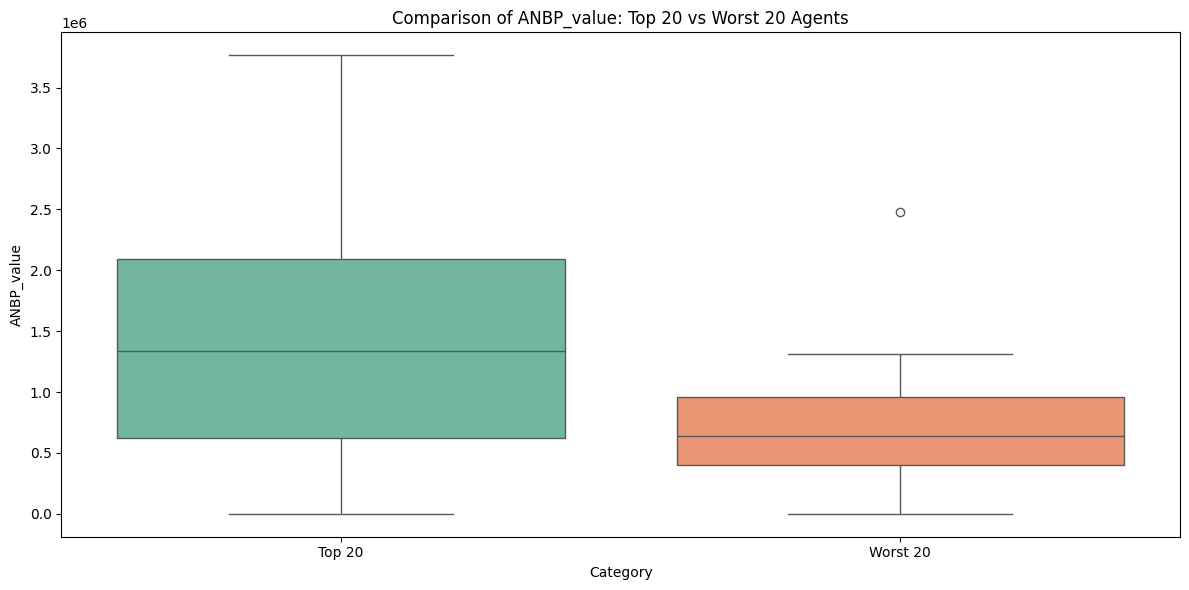

C:\Users\User\AppData\Local\Temp\ipykernel_14464\47637500.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents_earning, palette='Set2')


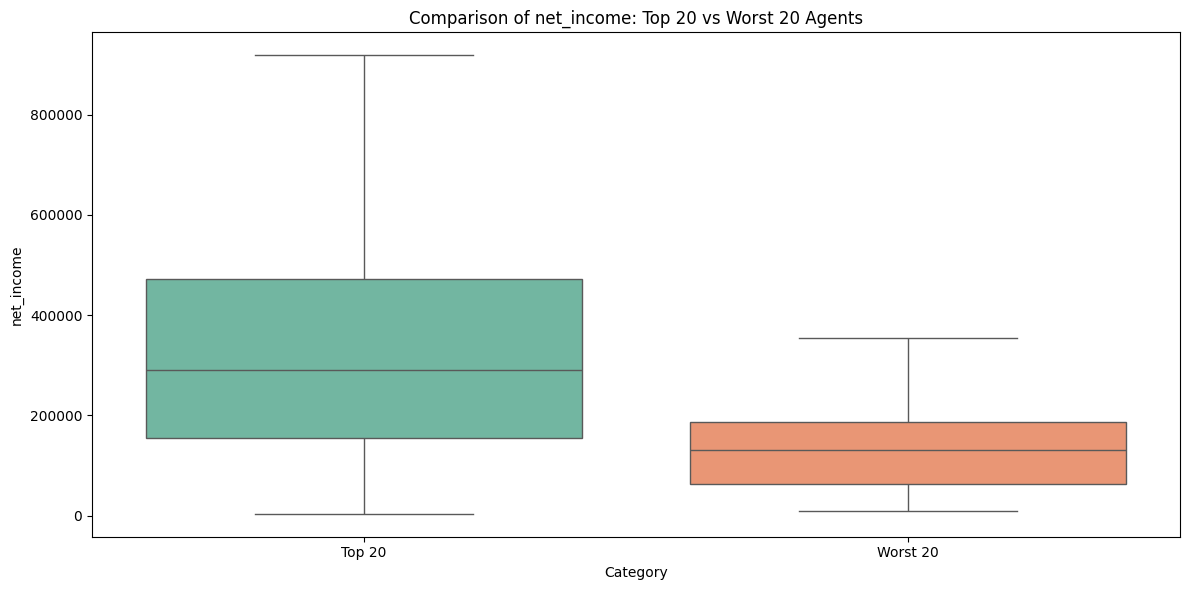

C:\Users\User\AppData\Local\Temp\ipykernel_14464\47637500.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents_earning, palette='Set2')


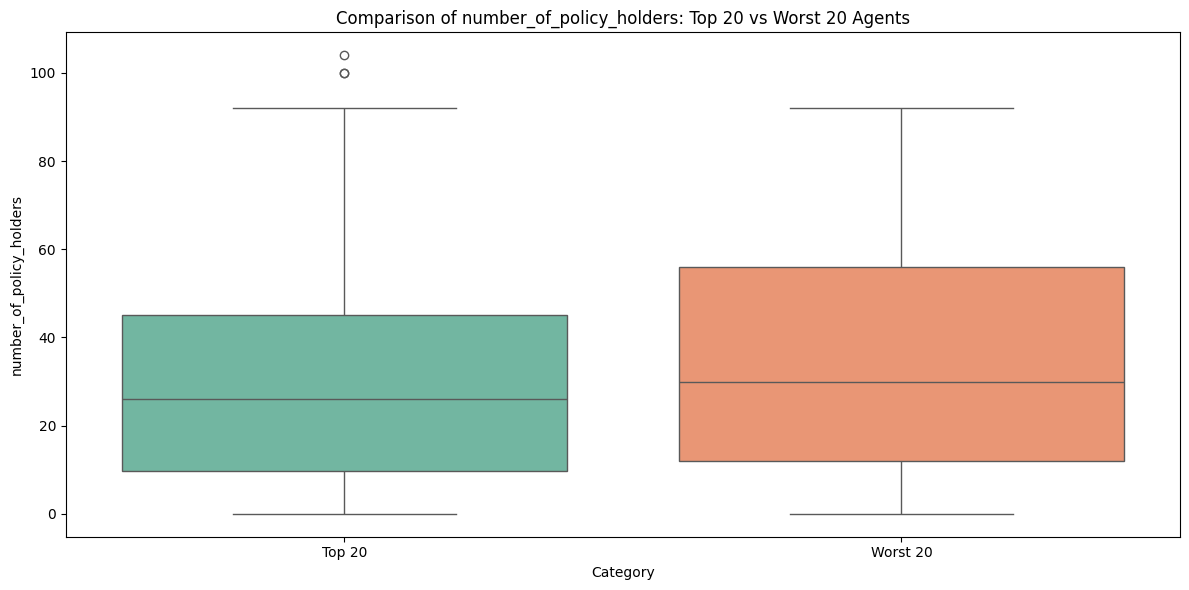

C:\Users\User\AppData\Local\Temp\ipykernel_14464\47637500.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=combined_agents_earning, palette='Set2')


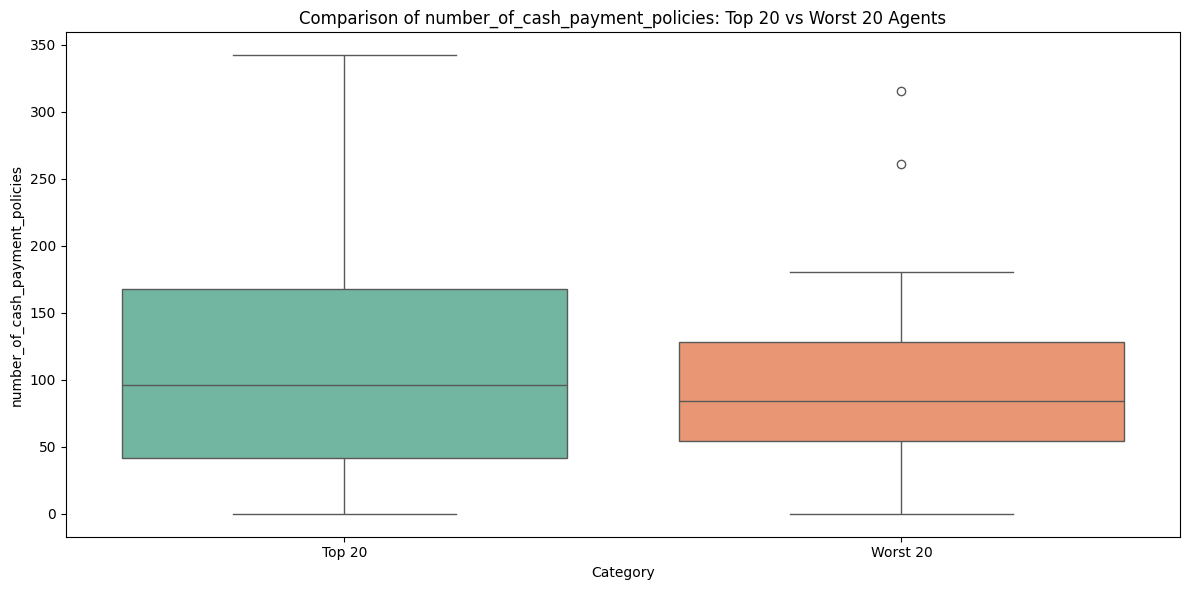

In [32]:
# Drop non-numeric or ID columns
exclude = ['row_id', 'agent_code', 'agent_join_month', 'first_policy_sold_month', 'year_month']
numerical_cols = [col for col in combined_agents_earning.columns if combined_agents_earning[col].dtype != 'object' and col not in exclude]

# Plot boxplots for each numerical feature
for col in numerical_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Category', y=col, data=combined_agents_earning, palette='Set2')
    plt.title(f'Comparison of {col}: Top 20 vs Worst 20 Agents')
    plt.xlabel('Category')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

From the above analysis:

combining the top 20 and worst 20 agents into a single DataFrame, adding a 'Category' column to distinguish between them, and visualizing the comparison using a bar chart. The chart highlights the differences in `new_policy_count` between the top-performing and least-performing agents.

- **New Policy Count**:  
    There is a clear difference between the top agents and the worst agents, as observed in the visualization. The `new_policy_count` of top agents is significantly higher than that of the worst agents.

- **Agent Age**:  
    Age does not appear to play a significant role in the performance of agents.

- **Unique Proposals**:  
    Features such as `unique_proposals_last_7_days`, `unique_proposals_last_15_days`, and `unique_proposals_last_21_days` play a crucial role. Top agents have significantly higher values for these features compared to the worst agents.

- **Unique Quotations**:  
    The distribution of `unique_quotations_last_15_days` for top agents is noticeably larger than that of the worst agents. Similarly, `unique_quotations` also plays an important role.

- **ANBP Value**:  
    The `ANBP_value` has a small but noticeable impact on the performance of agents.

- **Number of Policy Holders**:  
    The distribution of `number_of_policy_holders` (mean) for top agents is lower than that of the worst agents.

- **Number of Cash Payment Policies**:  
    The `number_of_cash_payment_policies` is significantly higher for top agents compared to the worst agents.


Combining the top 20 and worst 20 agents into a single DataFrame, adding a 'Category' column to distinguish between them, and visualizing the comparison using a bar chart. The chart highlights the differences in `net_income` between the top-performing and least-performing agents.

The comparison of `net_income` provides clear insights. From this analysis, we can derive actionable strategies for the worst-performing agents to improve their performance and income.

Key observations:

- **Age**: Agent age does not appear to have a significant impact on performance.
- **Unique Proposals**: The `unique_proposals_last_21_days` and overall `unique_proposals` are significantly higher for top-performing agents compared to the worst-performing agents.
- **Unique Quotations**: The distribution of `unique_quotations_last_15_days` and overall `unique_quotations` is higher for top-performing agents, both in terms of mean and distribution.
- **New Policy Count**: This metric plays a significant role, with top-performing agents having a much higher `new_policy_count` than the worst-performing agents.
- **ANBP Value**: The `ANBP_value` shows a higher distribution and mean for top-performing agents.
- **Number of Cash Payment Policies**: The distribution of `number_of_cash_payment_policies` is significantly higher for top-performing agents.

The term "distribution" here refers to the spread of values across the dataset.
